In [1]:
import pandas as pd
import numpy as np

# Regresión Lineal

Un modelo lineal hace una predicción simplemente computando una suma ponderada de unas covariables de entrada más un termino independiente llamado el termino de sesgo (también intercepto)

$$ \hat{y} = \theta_0 + \sum_{i = 1}^{n} \theta_i x_i$$

En esta ecuación:

$\hat{y}$ es el valor que se predijo.

$n$ es el número de covariables.

$x_i$ es el i-ésimo valor de la covariable. 

$\theta_j$ es el j-ésimo parámetro del modelo.

Esto se puede expresar de una manera más compacta usando notación matricial (una forma vectorizada):

$$\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta}\cdot\mathbf{x}$$

$\mathbf{\theta}$: es el vector de parámetros del modelo $[\theta_0, \cdots, \theta_n]^{T}$

$\mathbf{x}$: es el vector con los valores de las covariables $[1, x_1, \cdots, \theta_n]^{T}$

**Nota**: es preferible ver el producto punto como un producto matricial, es decir no considerar $\mathbf{\theta}\cdot\mathbf{x}$ sino que $\mathbf{\theta}^{T}\mathbf{x}$

Notación a tener en cuenta:

$\mathbf{X}$: matriz de todas las observaciones para las covariables. 

$\mathbf{y}$: vector con todos los valores de la variable respuesta para cada observación. 

$\mathbf{x}^{(i)}$: es el vector con los valores de las covariables para la i-ésima observación.

$y^{(i)}$: es el valor de la variable respuesta para la i-esima observación.

\begin{align}
        \mathbf{X} &= \begin{bmatrix}
                      \left(\mathbf{x}^{(1)}\right)^{T} \\ 
                      \vdots \\
                      \left(\mathbf{x}^{(n)}\right)^{T}
                      \end{bmatrix}
\end{align}

Para entrenar un modelo de regresión se busca alguna medida para determinar cuan bien o mal es el rendimiento del modelo, para ello se utiliza el MSE (erro cuadrático medio) y se busca el valor de $\mathbf{\theta}$ que lo minimize.

El MSE para un conjunto de datos se calcula de la siguiente manera: $$MSE = \frac{1}{m} \sum_{i = i}^{m}  \left(\mathbf{\theta}^{T}\mathbf{x}^{(i)}-y^{(i)}\right)^2$$

## La ecuación normal

Para encontrar el valor de $\mathbf{\theta}$ que minimiza la medida determinada anteriormente (función de costo) se tiene una forma cerrada de la solución, esto es llamado la ecuación normal. $$\hat{\mathbf{\theta}} =  \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T} \mathbf{y}$$

In [2]:
#generando datos lineales
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

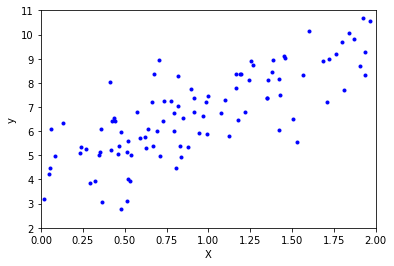

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.axis([np.floor(np.min(X)), np.ceil(np.max(X)), np.floor(np.min(y)), np.ceil(np.max(y))])
plt.show()

In [4]:
#calculando theta gorro usando la ecuación normal
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.27566445],
       [2.64208834]])

Se hubiera esperado el vector $[4, 3]^{T}$ para los parámetros, sin embargo la función que se uso para generar los datos fue $y = 4+3x+noise$ donde noise es ruido Gaussiano (números aleatorios de una distribución normal estándar) y por ende es imposible recuperar los valores originales de los parámetros.

In [5]:
#haciendo predicciones
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #añadiendo el 1 necesario para la predicción
y_predict = X_new_b.dot(theta_best) # se hace así para que las filas del vector X s hagan producto punto xon 
y_predict

array([[4.27566445],
       [9.55984113]])

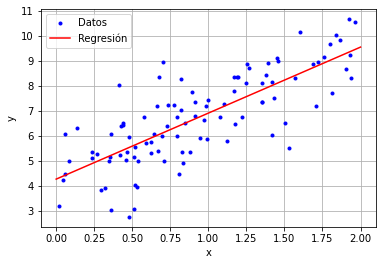

In [6]:
#mostrando las predicciones hechas por el modelo
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("x")
plt.ylabel("y")
plt.grid("on")
plt.legend(["Datos", "Regresión"])
plt.show()

In [7]:
#implementando scikit
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[4.27566445],
       [9.55984113]])

La clase LinearRegression está implementada sobre scipy.linalg.lstsq(), la cual se puede invocar directamente como se muestra a continuación

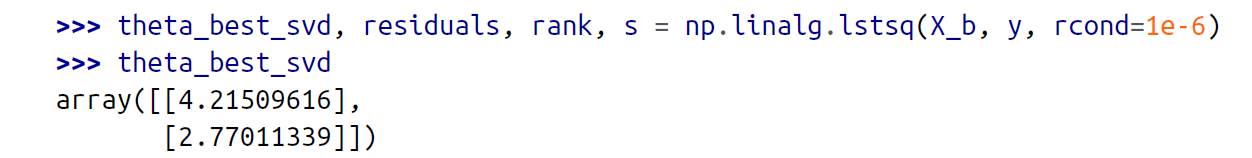

esta función computa $\hat{\mathbf{\theta}} = \mathbf{X}^{+}\mathbf{y}$ donde $\mathbf{X}^{+}$ es la matriz pseudo-inversa de $\mathbf{X}$, específicamente la inversa de Moore-Penrose, la cual siempre está bien definida y existe, pues se pueden tener problemas si la matriz $\left(\mathbf{X^{T}X}\right)^{-1}$ es singular, esto a través de descompoción de valores singulares (SVD).

### Complejidad computacional

La tarea de invertir una matriz como lo es x en general tiene una eficiencia de entre $O(n^{2.4})$ y $O(n^{2.4})$$O(n^{3})$, sin embargo al usar SVD esta se reduce a $O(n^{2})$, además, a pesar de que se tornan lentos para grandes conjuntos de datos, su complejidad es lineal respecto al número de variables lo que le permite lidiar con grandes conjuntos de datos siempre y cuando estos quepan en la memoria. 

Por último, hacer predicciones es lineal con respecto a la cantidad de covariables tenidas en cuenta y a la cantidad de predicciones que se deseen usar. 

## Descenso del gradiente

Es una técnica empleada cuando se tiene un número grande de covariables u observaciones (no caben en memoria).

La idea general es mover los parámetros de manera iterativa para minimizar una función de costo, el descenso del gradiente mide el gradiente de la función de error con respecto al vector de parámetros y va en la dirección que descienda el gradiente, una vez el gradiente es cero, se tiene un mínimo.

Concretamente se inicia asignando a $\mathbf{\theta}$ valores aleatorios, luego se mejora esta aproximación tomando un paso pequeño a la vez, cada paso intentando disminuir la función de costo hasta que el algoritmo converja a un mínimo.

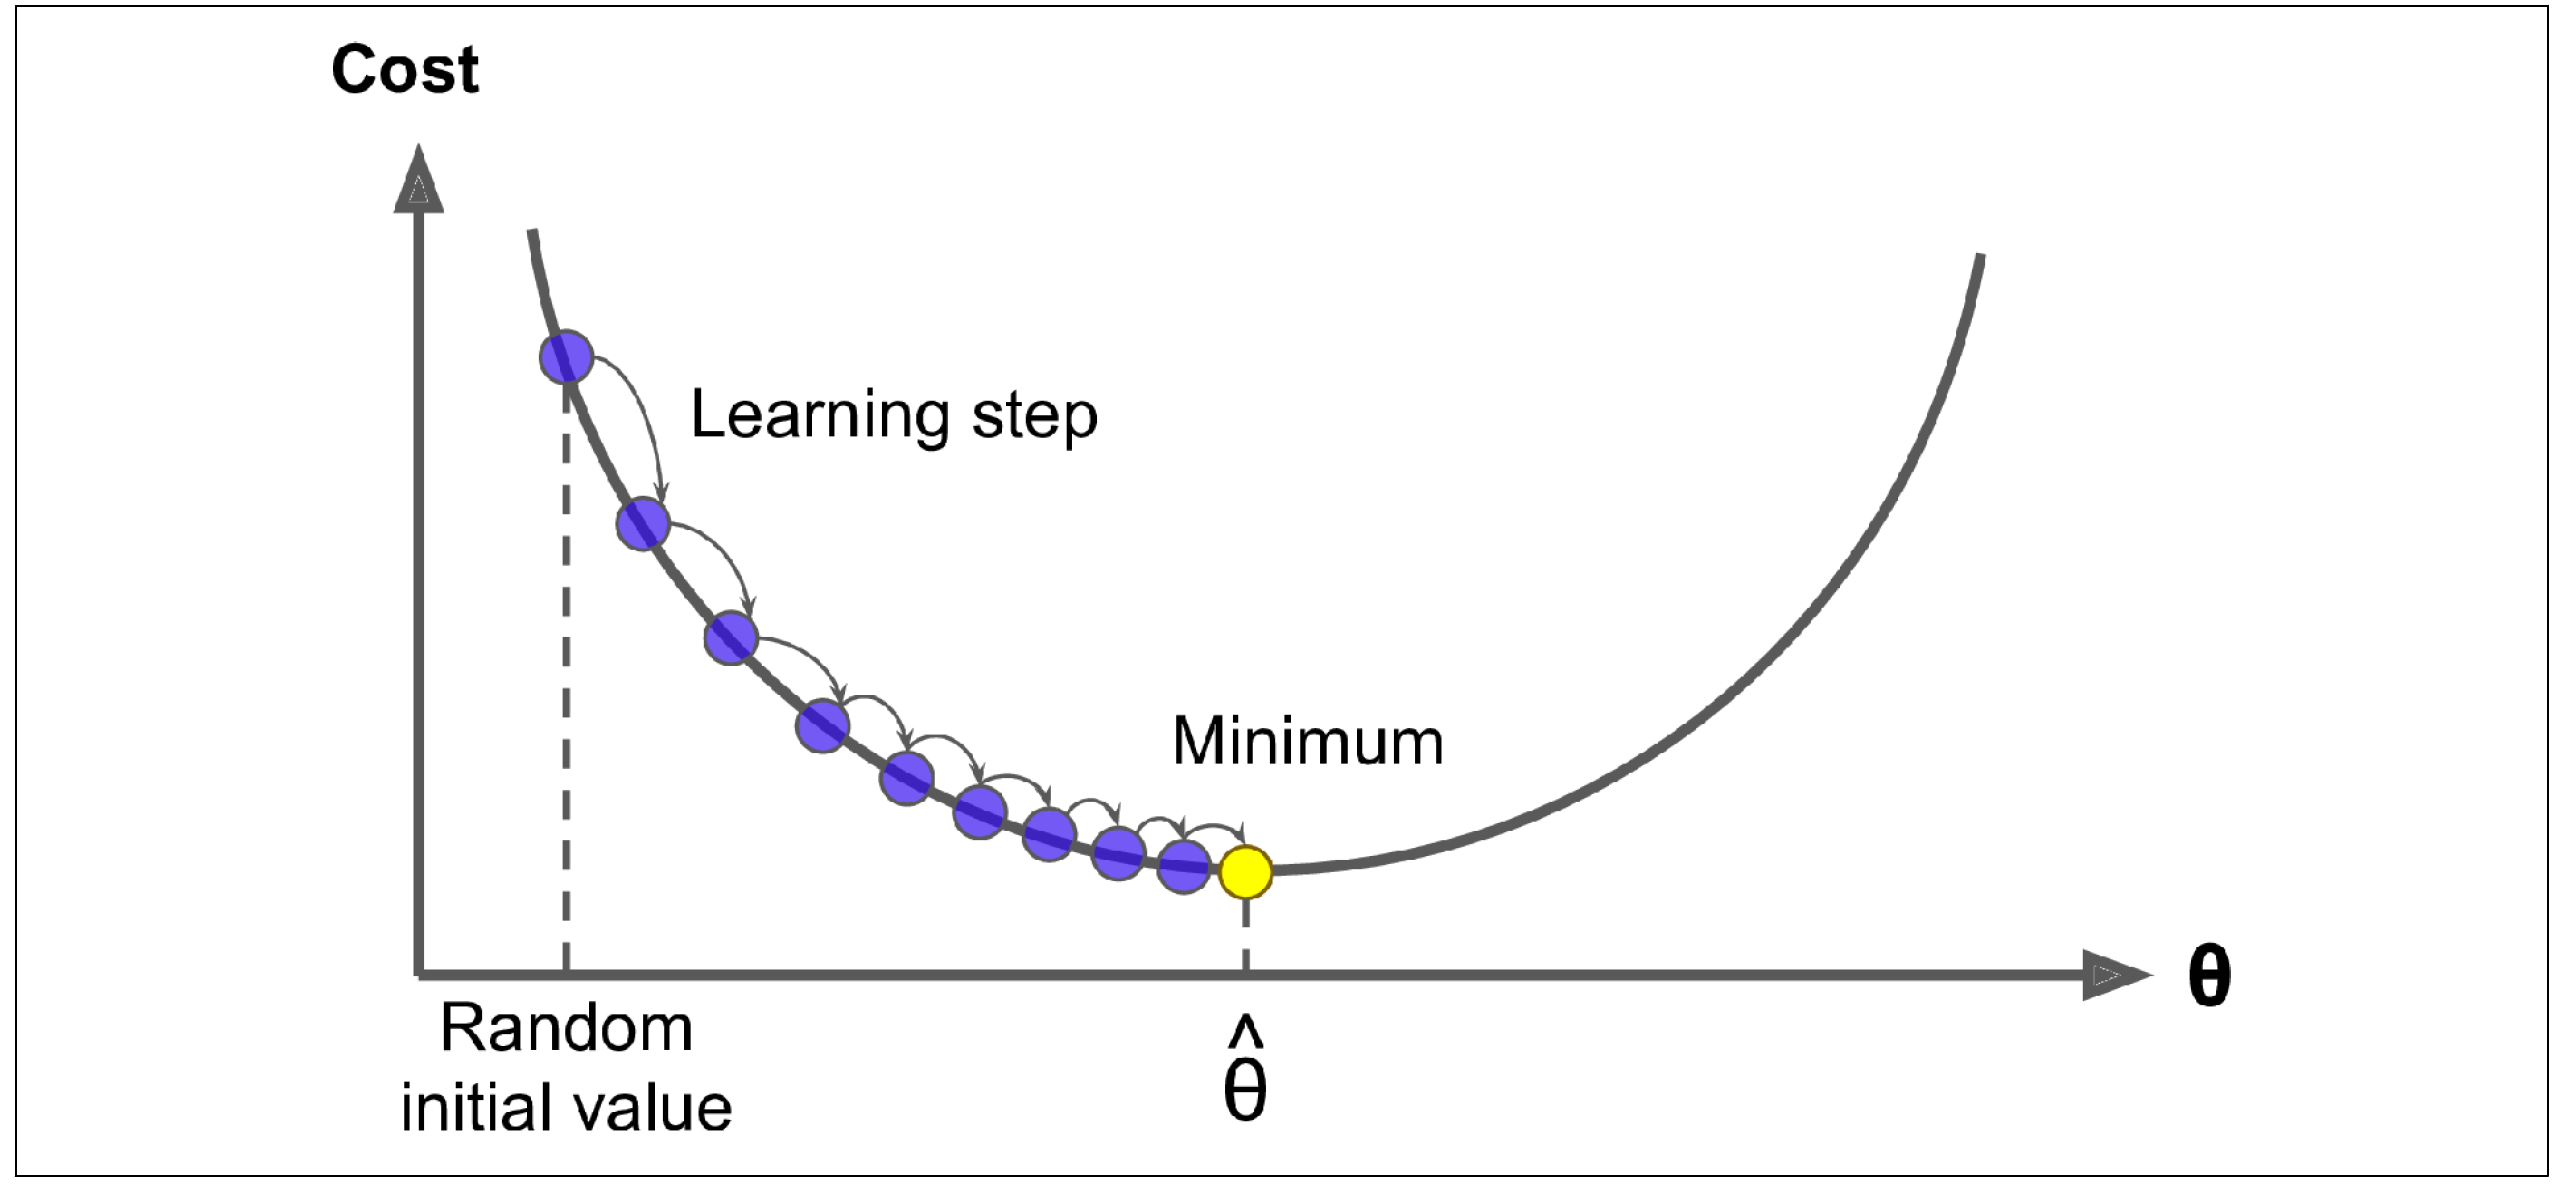

**Nota**: un parámetro importante es el tamaño de paso, determinado por el hiperparámetro de tasa de aprendizaje. Si este es muy pequeño al algoritmo le va a costar converger pues va a tener que realizar muchas iteraciones.

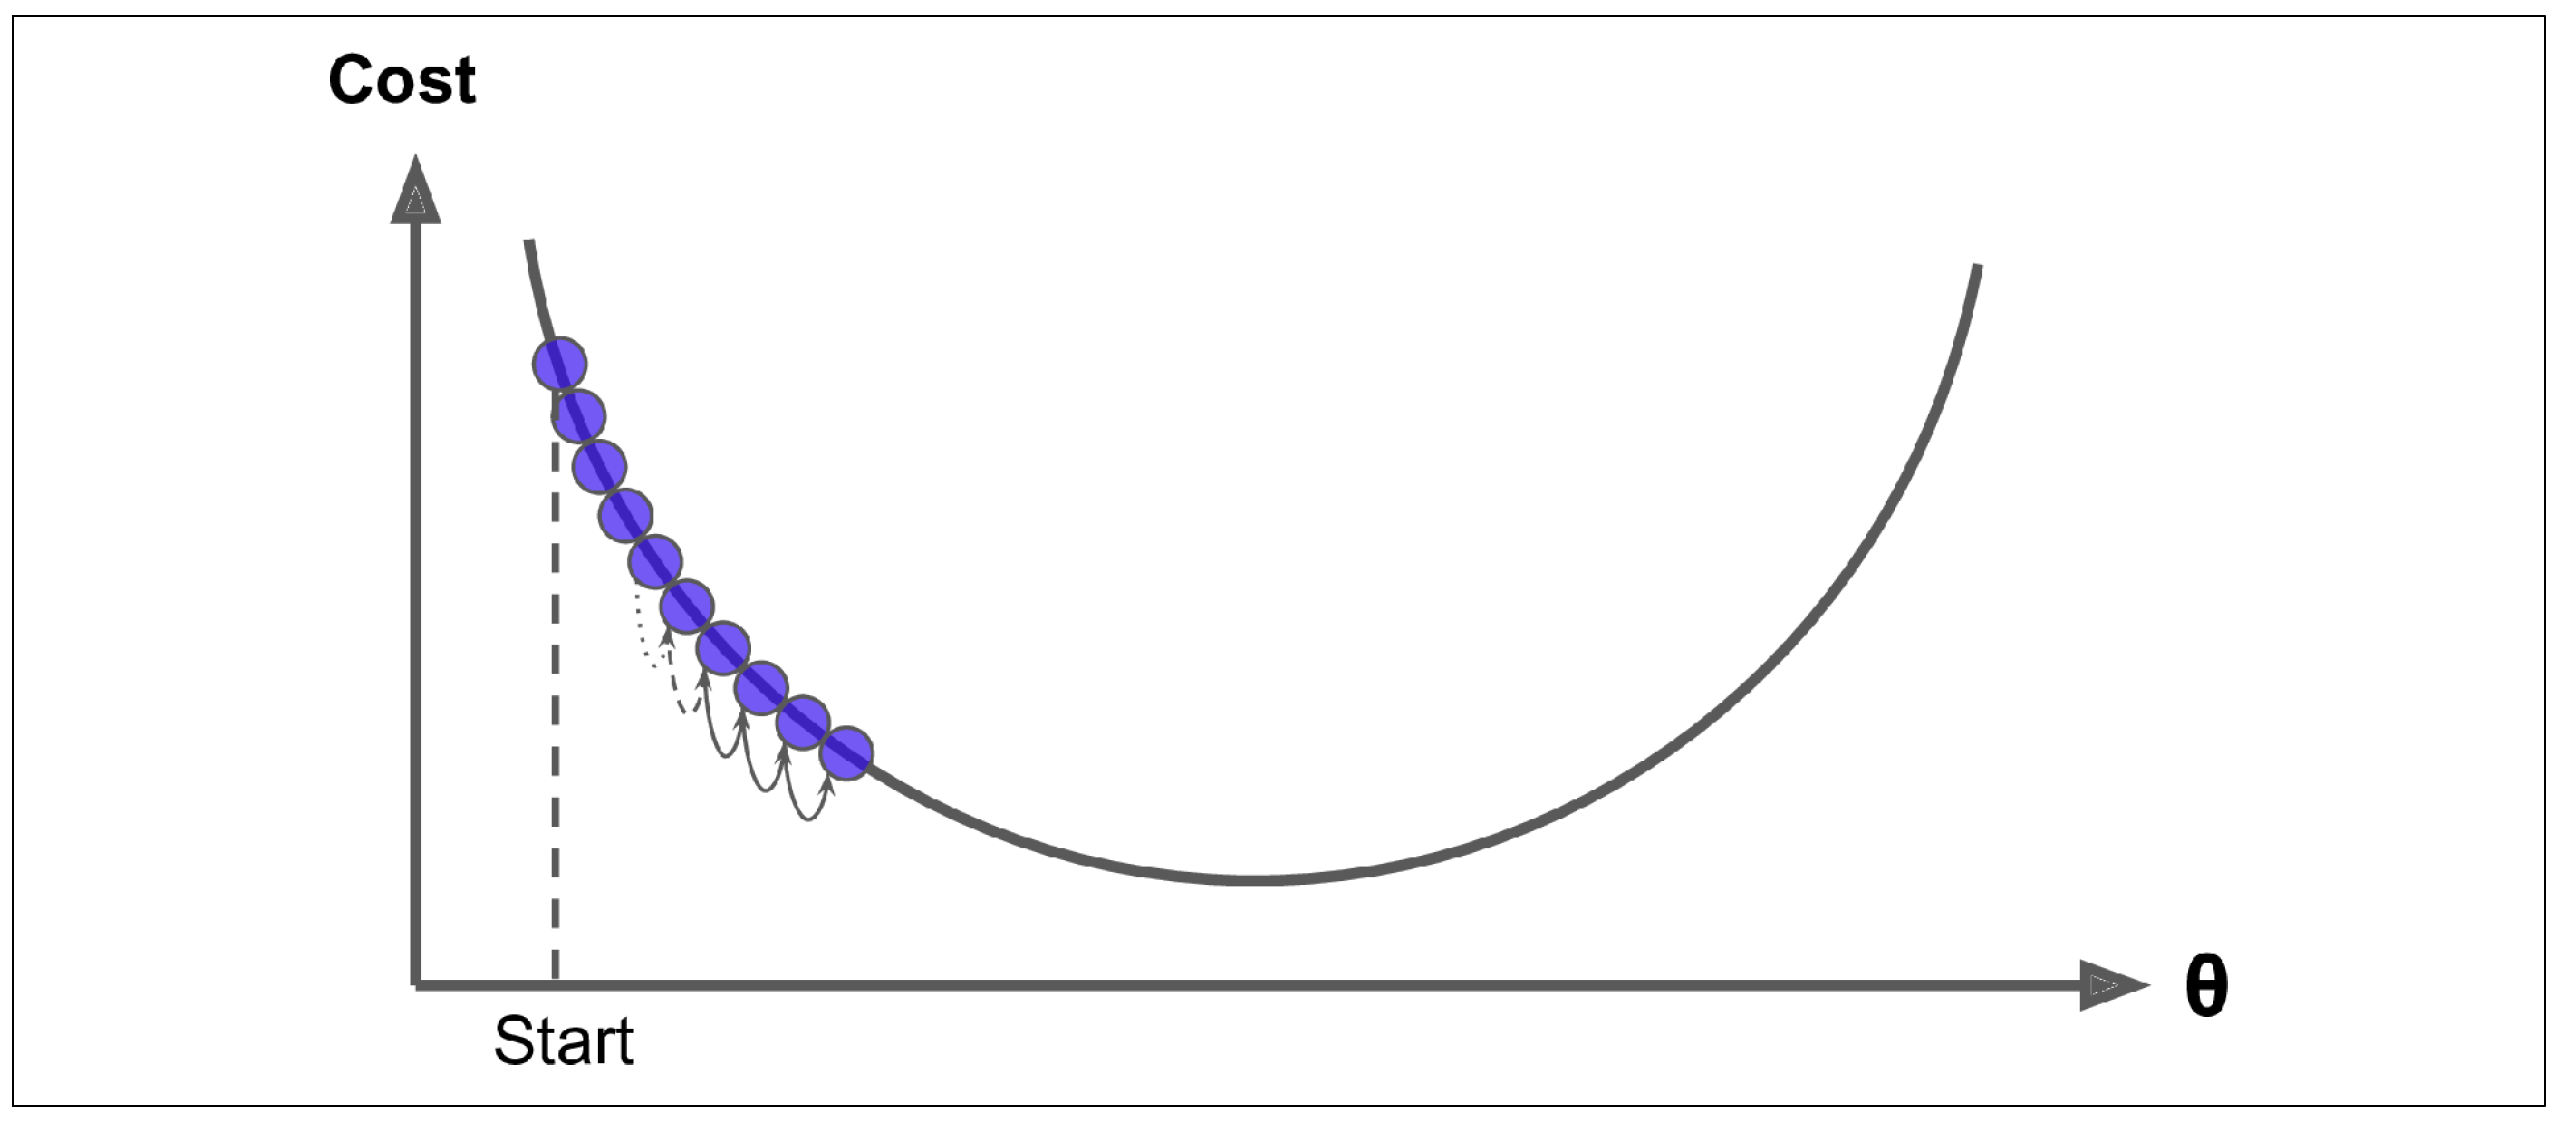

Por el otro lado, si es muy alto se puede hacer que el algoritmo cruce de un lado a otro o posea un comportamiento raro, llevando a que este diverja.

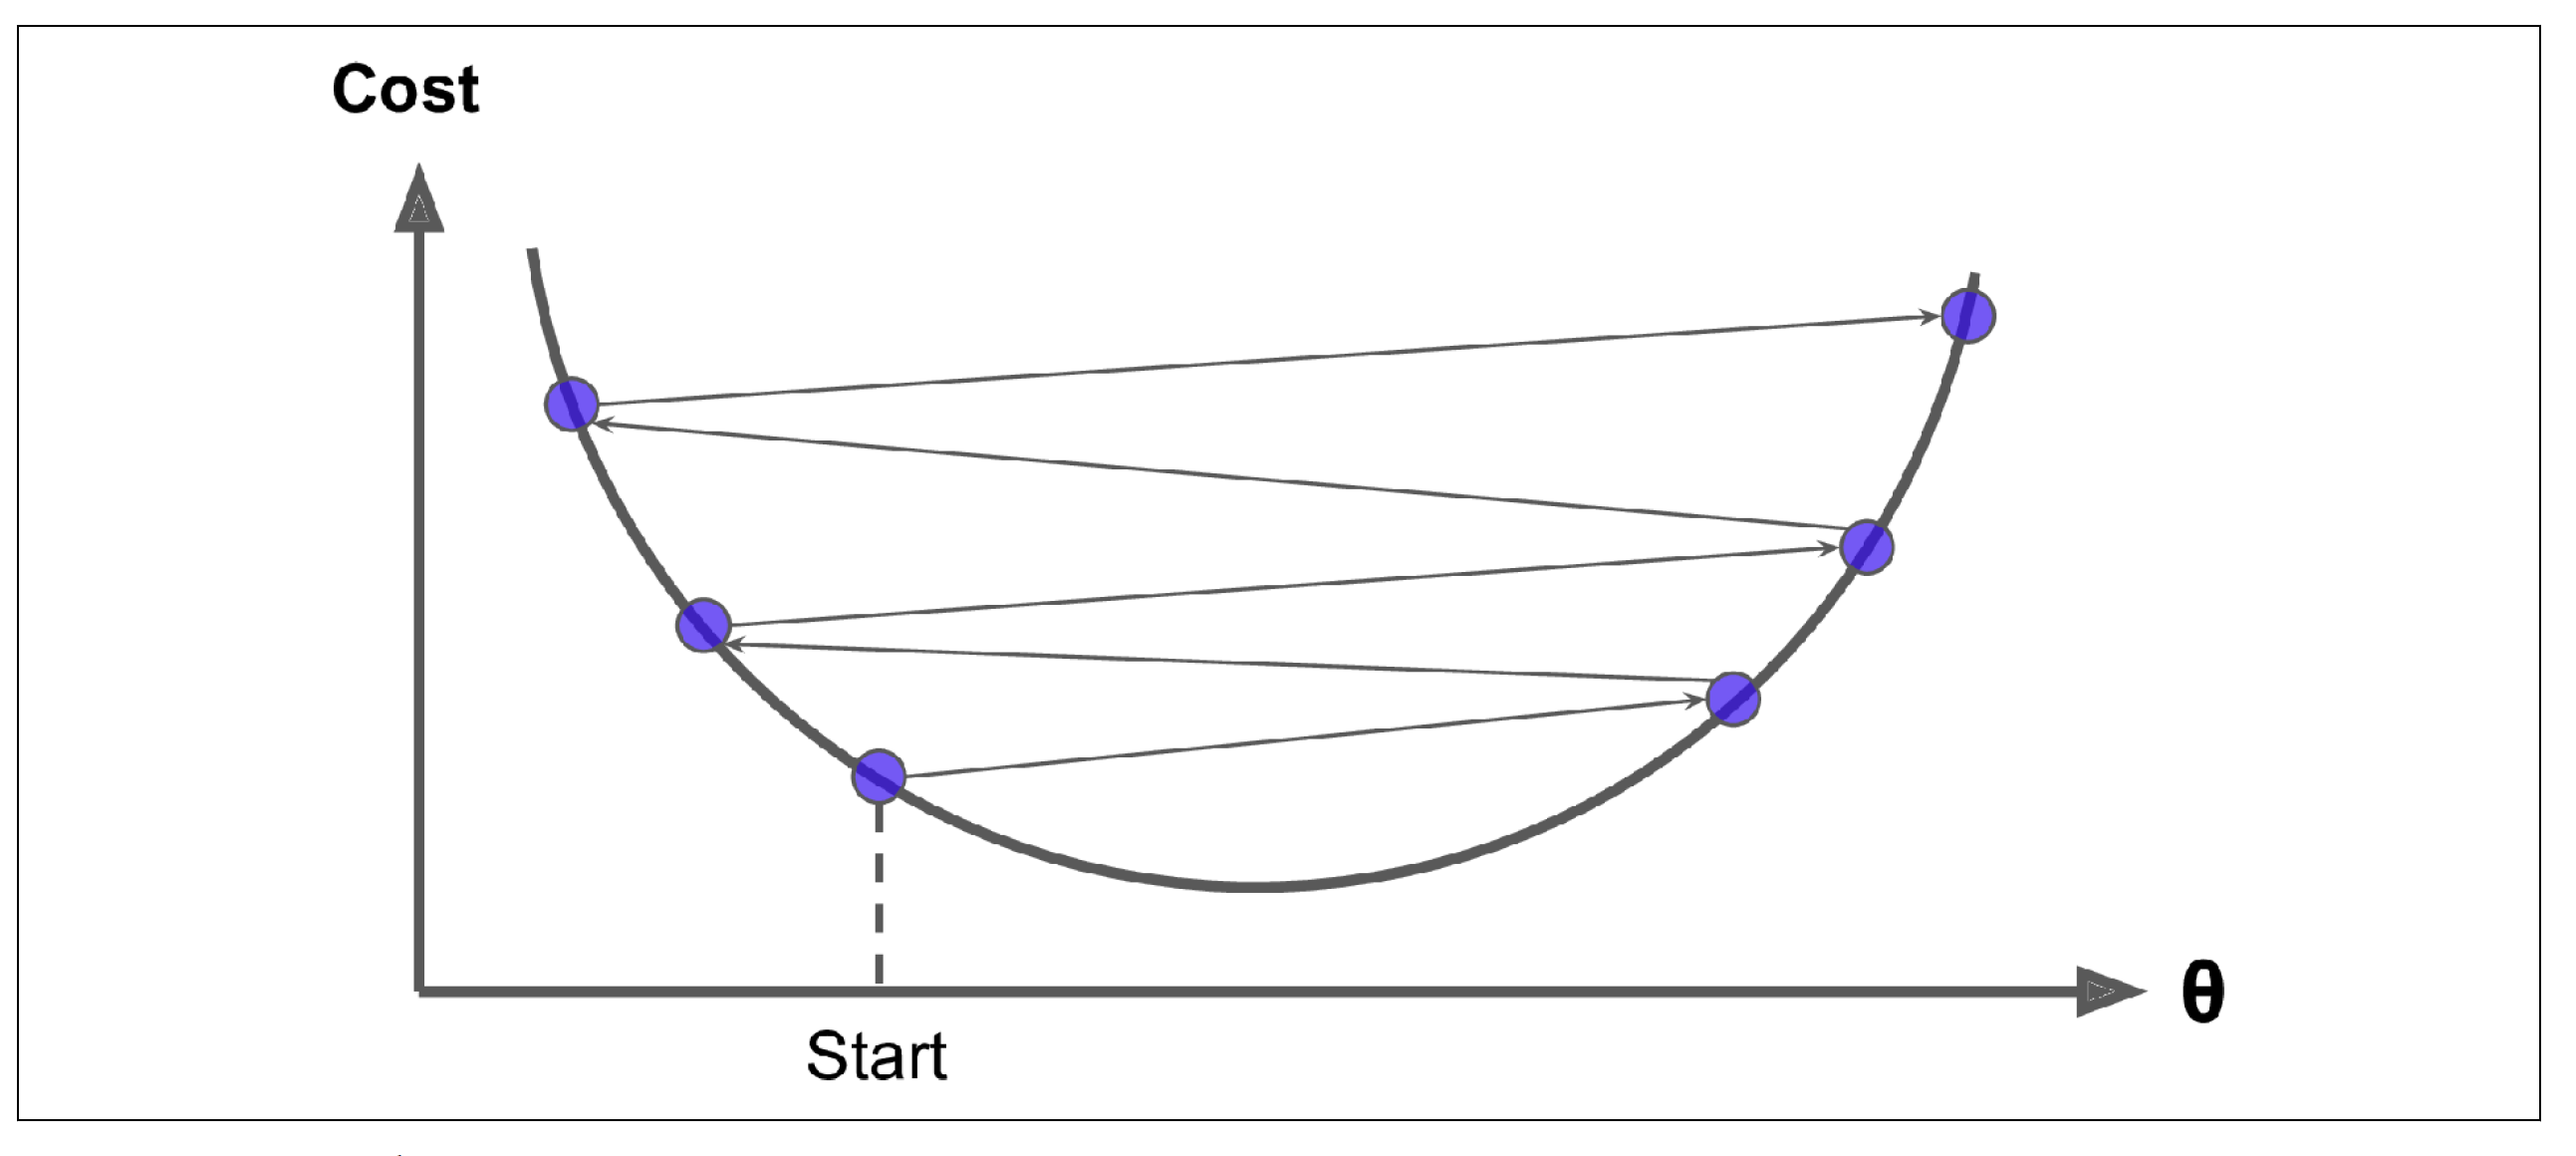

Finalmente es necesario tener en cuenta que no todas las funciones van a tener un buen, comportamiento y pueden suceder cosas como una convergencia lenta (caso de la derecha) o encontrar un extremo local en vez de un extremo global (caso de la izquierda).

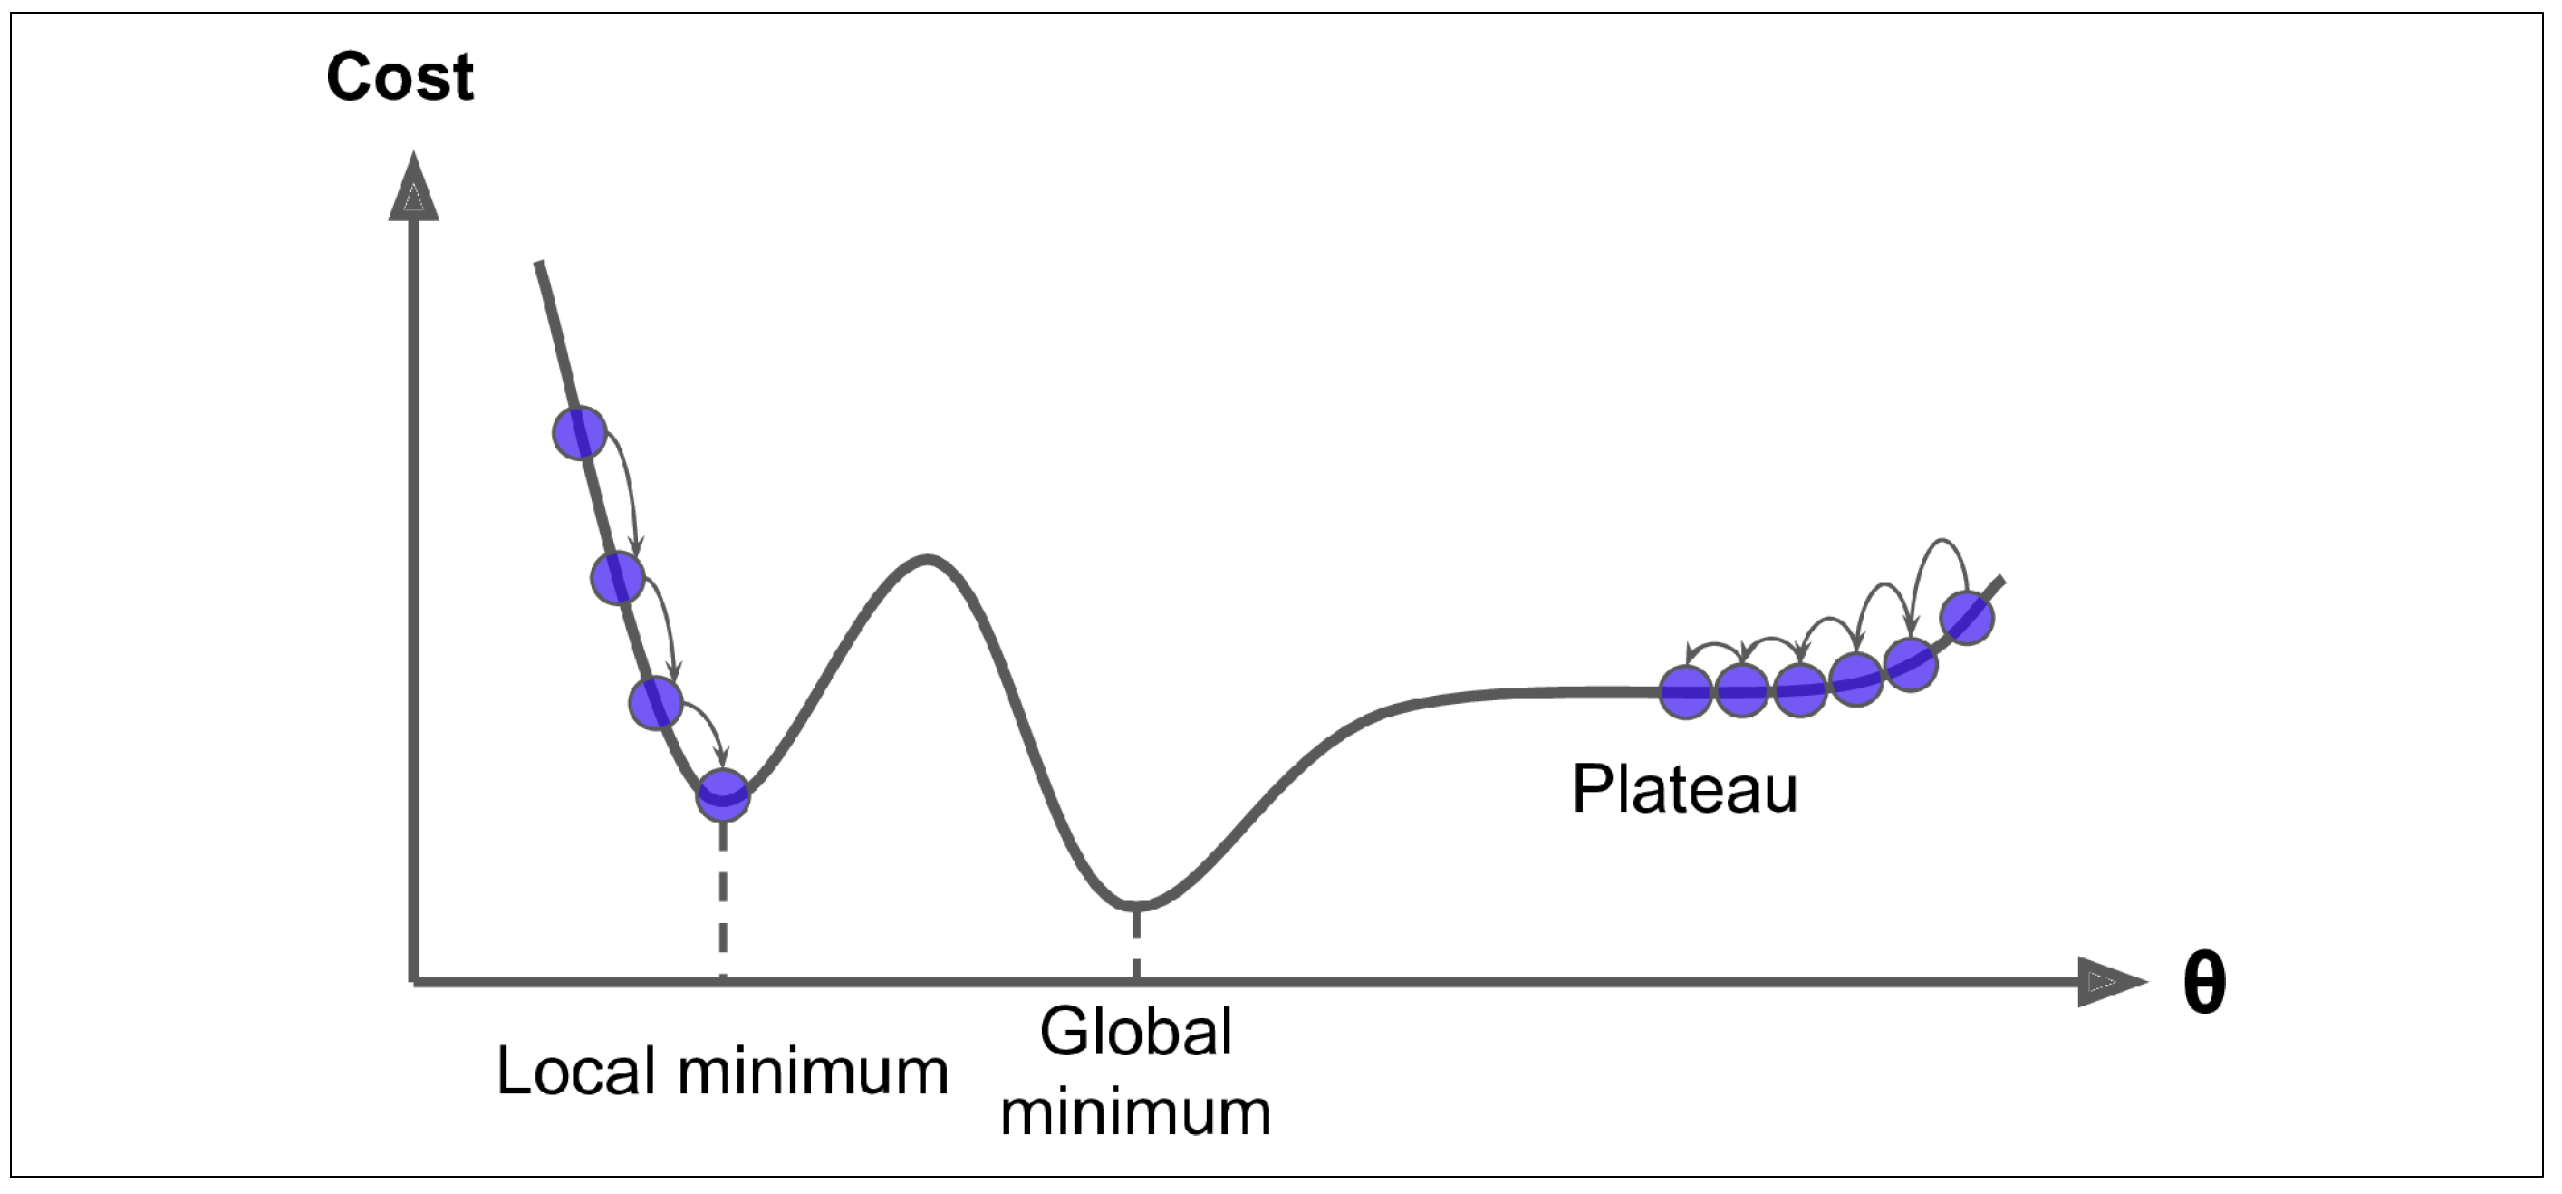

Es necesario tener en cuenta que para usar descenso de gradiente las variables deben estar en la misma escala o de lo contrario el algoritmo podría tomar mucho en converger.

### Descenso del gradiente por lotes

Para hacer esto se necesita computar el gradiente de la función de costo 

\begin{align}
    \vec{\nabla} MSE\left(\mathbf{\theta}\right) &= \begin{pmatrix}
                                                    \frac{\partial}{\partial \theta_0} MSE\left(\mathbf{\theta}\right)\\
                                                    \frac{\partial}{\partial \theta_1} MSE\left(\mathbf{\theta}\right)\\
                                                    \vdots\\
                                                    \frac{\partial}{\partial \theta_n} MSE\left(\mathbf{\theta}\right)
                                               \end{pmatrix}
\end{align}

Donde $\frac{\partial}{\partial \theta_j} MSE\left(\mathbf{\theta}\right) = \frac{2}{m} \sum_{i = 1}^{m}  \left(\mathbf{\theta}^{T}\mathbf{x}^{(i)}-y^{(i)}\right)x_{j}^{(i)}$, así $\vec{\nabla} MSE\left(\mathbf{\theta}\right) = \frac{2}{m}\mathbf{X}^{T}\left(\mathbf{X\theta}-\mathbf{y}\right)$

Una vez se tiene la dirección del gradiente, se va en la dirección contraria (menos el gradiente), esto significa, restar el gradiente de el vector de parámetros. Acá es donde entra en juego la tasa de aprendizaje ($\eta$), pues se multiplica el gradiente por $\eta$ para determinar la longitud del tamaño de paso de bajada, obteniendo así $$\mathbf{\theta}^{\left(j+1\right)} = \mathbf{\theta}^{\left(j\right)}-\eta \vec{\nabla} MSE\left(\mathbf{\theta}\right)$$  

In [8]:
#implementación del algoritmo
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta -= eta*gradients

theta  #encuentra exactamente lo mismo que la ecuación normal 

array([[4.27566445],
       [2.64208834]])

Para encontrar un valor apropiado para la tasa de aprendizaje se puede usar búsqueda por malla (grid search). Sin embargo se quiere limitar el número de iteraciones para que así la búsqueda pueda eliminar a aquellos modelos que toman mucho tiempo para converger.

Para detener el algortimo se utiliza una tolerancia $\epsilon$ tal que cuando la norma del gradiente sea menor que esta, se detiene el algoritmo. Para una función de costo convexa y sin cambios abruptos esta clase de descenso del gradiente converge con eficiencia de $O\left(\frac{1}{\epsilon}\right)$

### Descenso de gradiente estocástico

En el caso anterior se utilizaba todo el conjunto de datos para minimizar la función de costo, en este caso solo se usa una observación lo cual lo hace un algoritmo más rápido, sin embargo este enfoque va a hacer que el gradiente disminuya al largo plazo en promedio puesto que la observación a utilizar es elegida aleatoriamente, por esto la función de costo simplemente va a subir y bajar, pero con el tiempo va a resultar muy cerca del mínimo, pero una vez llegue allí va a seguir divagando sin estacionarse. Por ende, una vez el algoritmo acabe, los parámetros van a ser buenos pero quizás (lo más probable) no los óptimos.

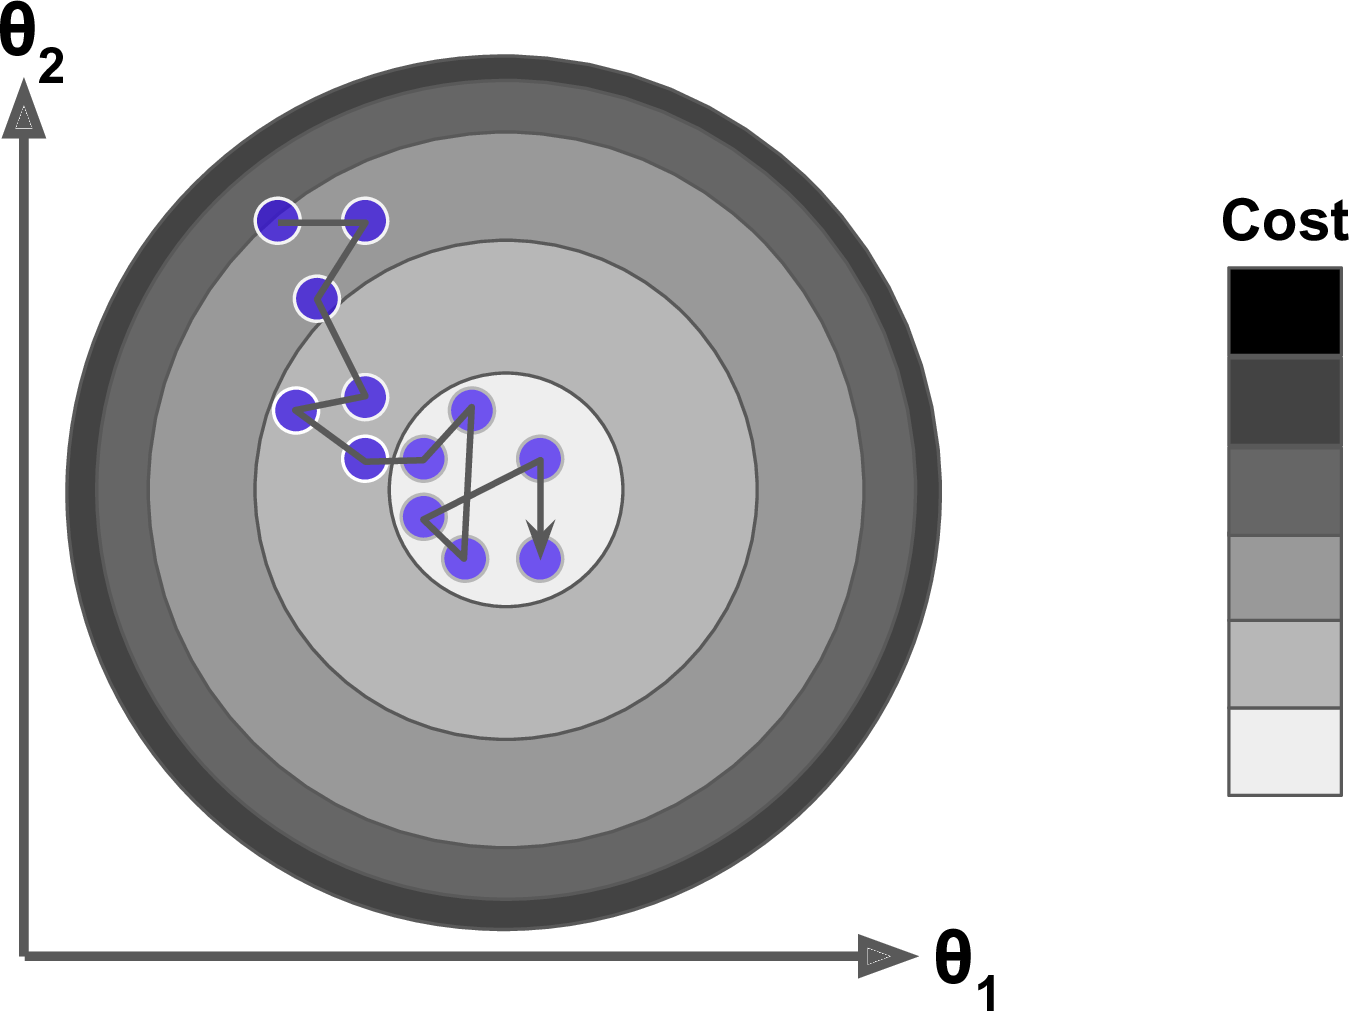

Curiosamente cuando se tienen funciones de costo irregulares (no convexas del todo) este algoritmo es un tanto beneficioso pues ayuda a saltar los extremos locales, teniendo una mejor chance de encontrar el mínimo local.

Si bien lo anterior es una gran ventaja, también puede suceder que nunca se llegue realmente al mínimo global, así que una solución a esto es ir reduciendo la tasa de aprendizaje a medida que el algoritmo avance.

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # definiendo el decremento de la tasa de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) #escogiendo el índice para la observación
        xi = X_b[random_index:random_index+1] #escogiendo la observación
        yi = y[random_index:random_index+1] #escogiendo el valor de la variable respuesta
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #calculando gradiente unidimensional
        eta = learning_schedule(epoch * m + i) #haciendo que decrezca la tasa de aprendizaje
        theta = theta - eta * gradients #calculando el descenso del gradiente

In [10]:
theta

array([[4.2361652 ],
       [2.71367718]])

Por convención se itera por rondas de m iteraciones (número de observaciones) y cada ronda se llama una época. Se debe tener en cuenta que para usar esto las observaciones deben ser IID, para asegurar que los parámetros sean llevados hacia el mínimo global, para asegurar esto se debe hacer un shuffle del conjunto de datos al inicio de cada época o escoger las observaciones de manera aleatoria. 

In [11]:
#implementación en scikir
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
#max iter: máximo de iteraciones
#tol: tolerancia, para si entre aproximaciones sucesivas hay una distancia menor al valor fijado
#eta0: valor inicial para la tasa de aprendizaje
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_ #valores para los parámetros

(array([4.31432602]), array([2.6850604]))

### Mini descenso del gradiente por lotes

En vez de calcular el gradiente con todo el conjunto de datos o con sola una observación, la idea es computar el gradiente usando conjuntos aleatorios de observaciones llamados mini lotes. Este algoritmo es menos errático que el descenso de gradiente estocástico pero puede ser más difícil para el escapar de extremos locales

In [13]:
#implementación de mua jeje
n_splits = 10
n_iters = 500
eta = 0.1
theta = np.random.rand(2,1)
eps = 1e-5
tolerance = False
for iter_ in range(n_iters):
    index = np.random.permutation(m)
    for split in range(n_splits):
        theta_prev = theta.copy()
        xi = X_b[index[10*split:10*(split+1)]]
        yi = y[index[10*split:10*(split+1)]]
        gradients = 2/n_splits * xi.T.dot(xi.dot(theta)-yi)
        theta -= eta*gradients
        if np.linalg.norm(theta - theta_prev) <= eps:
            tolerance = True
            break
    if tolerance:
        break
#también se puede hacer decrecer la tasa de aprendizaje

In [14]:
theta

array([[4.17621891],
       [2.56382654]])

Comparando la velocidad de convergencia y el comportamiento de los tres algoritmos en el espacio parametral.

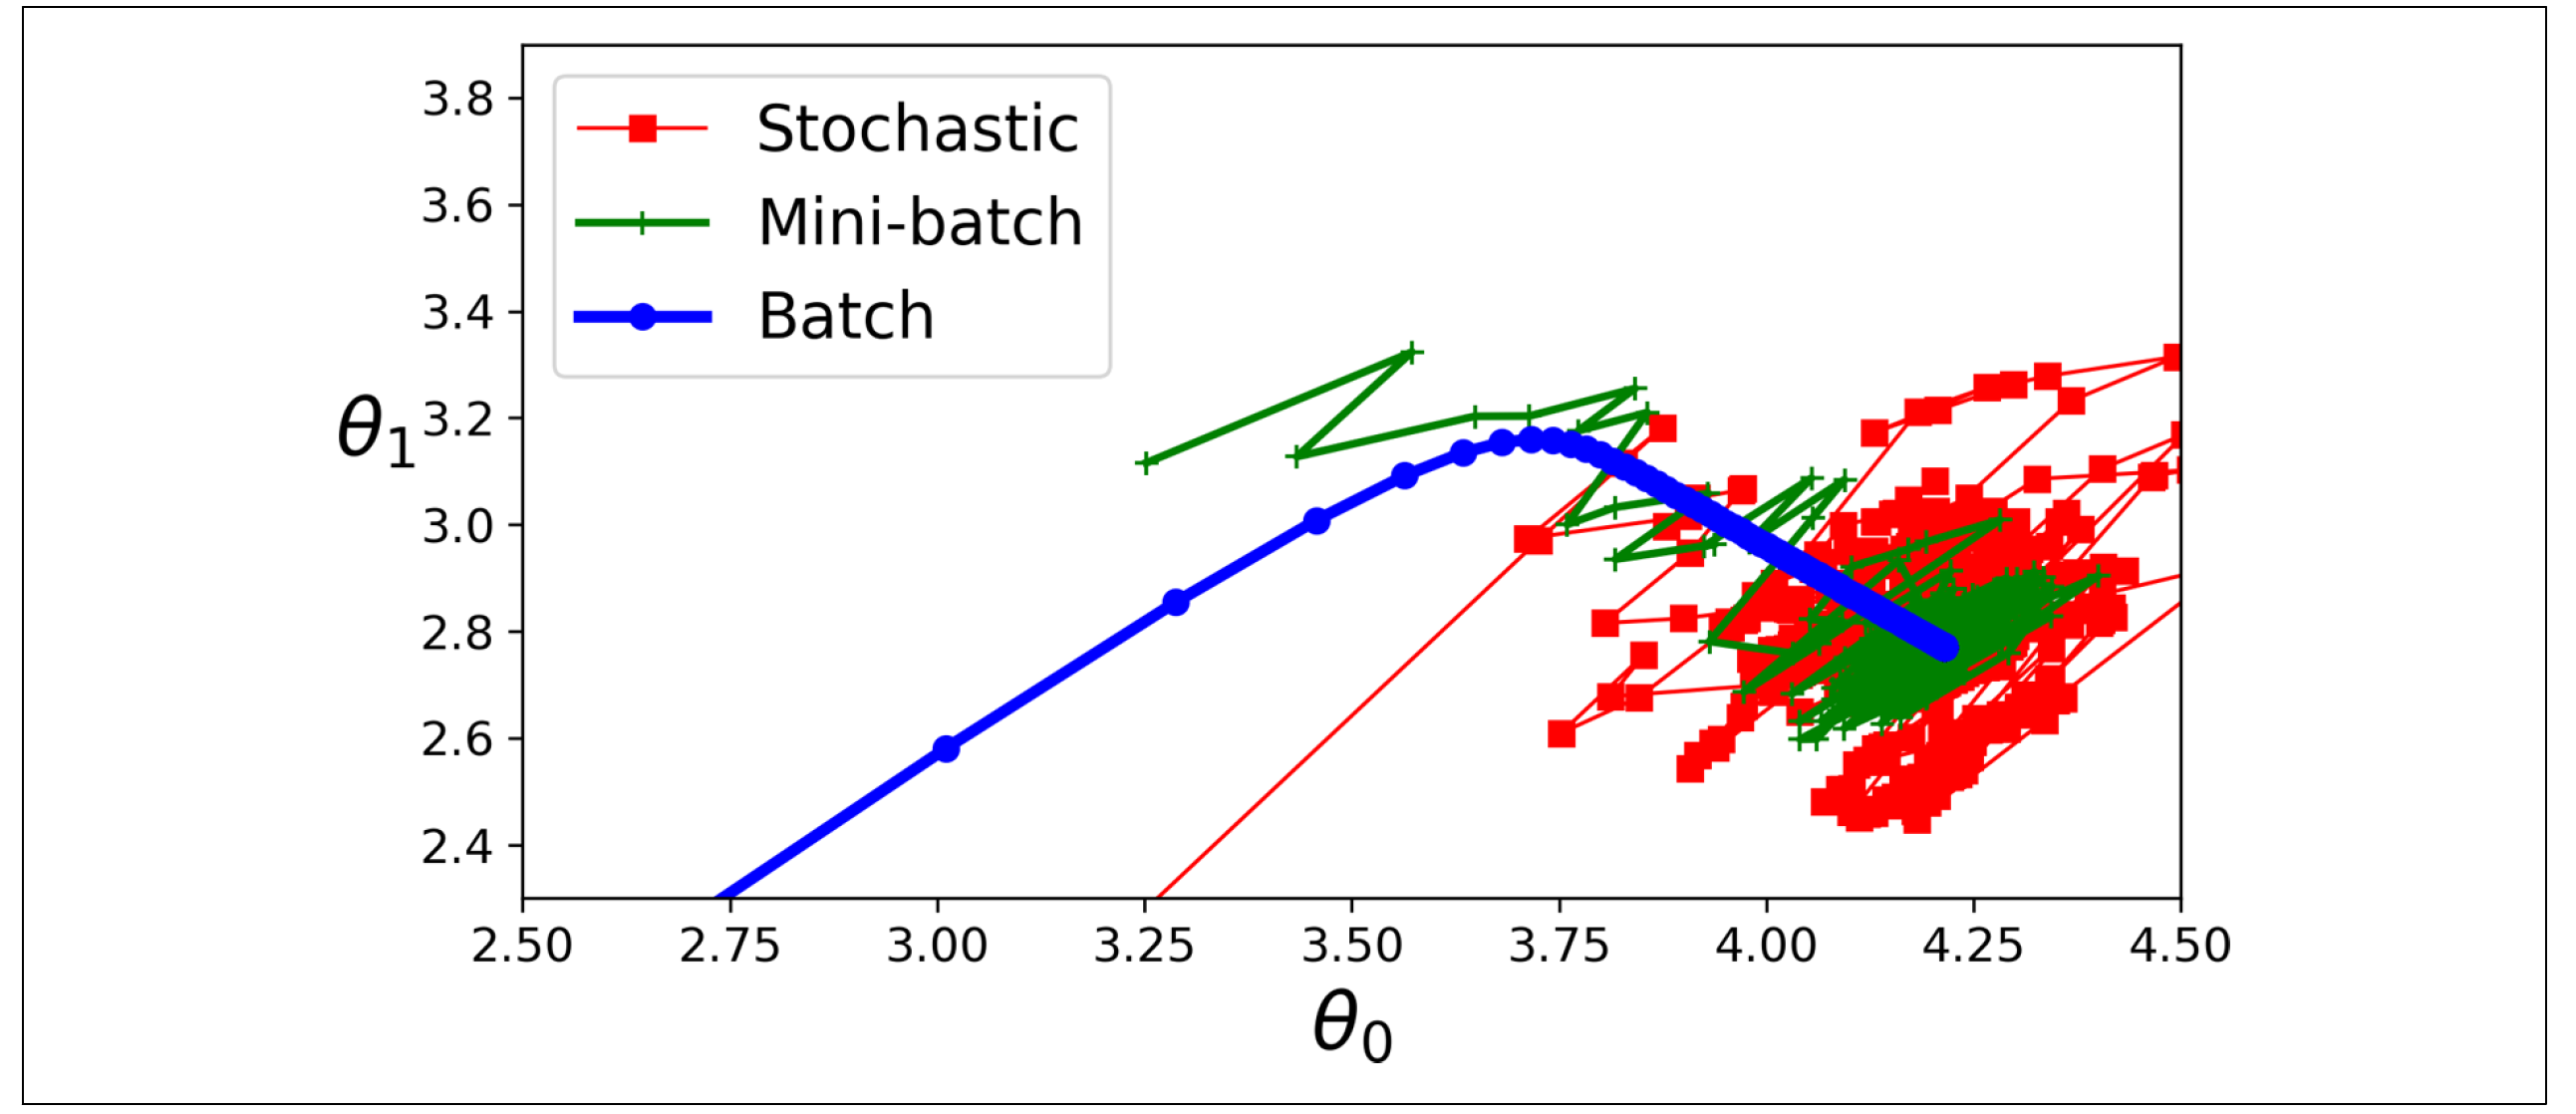

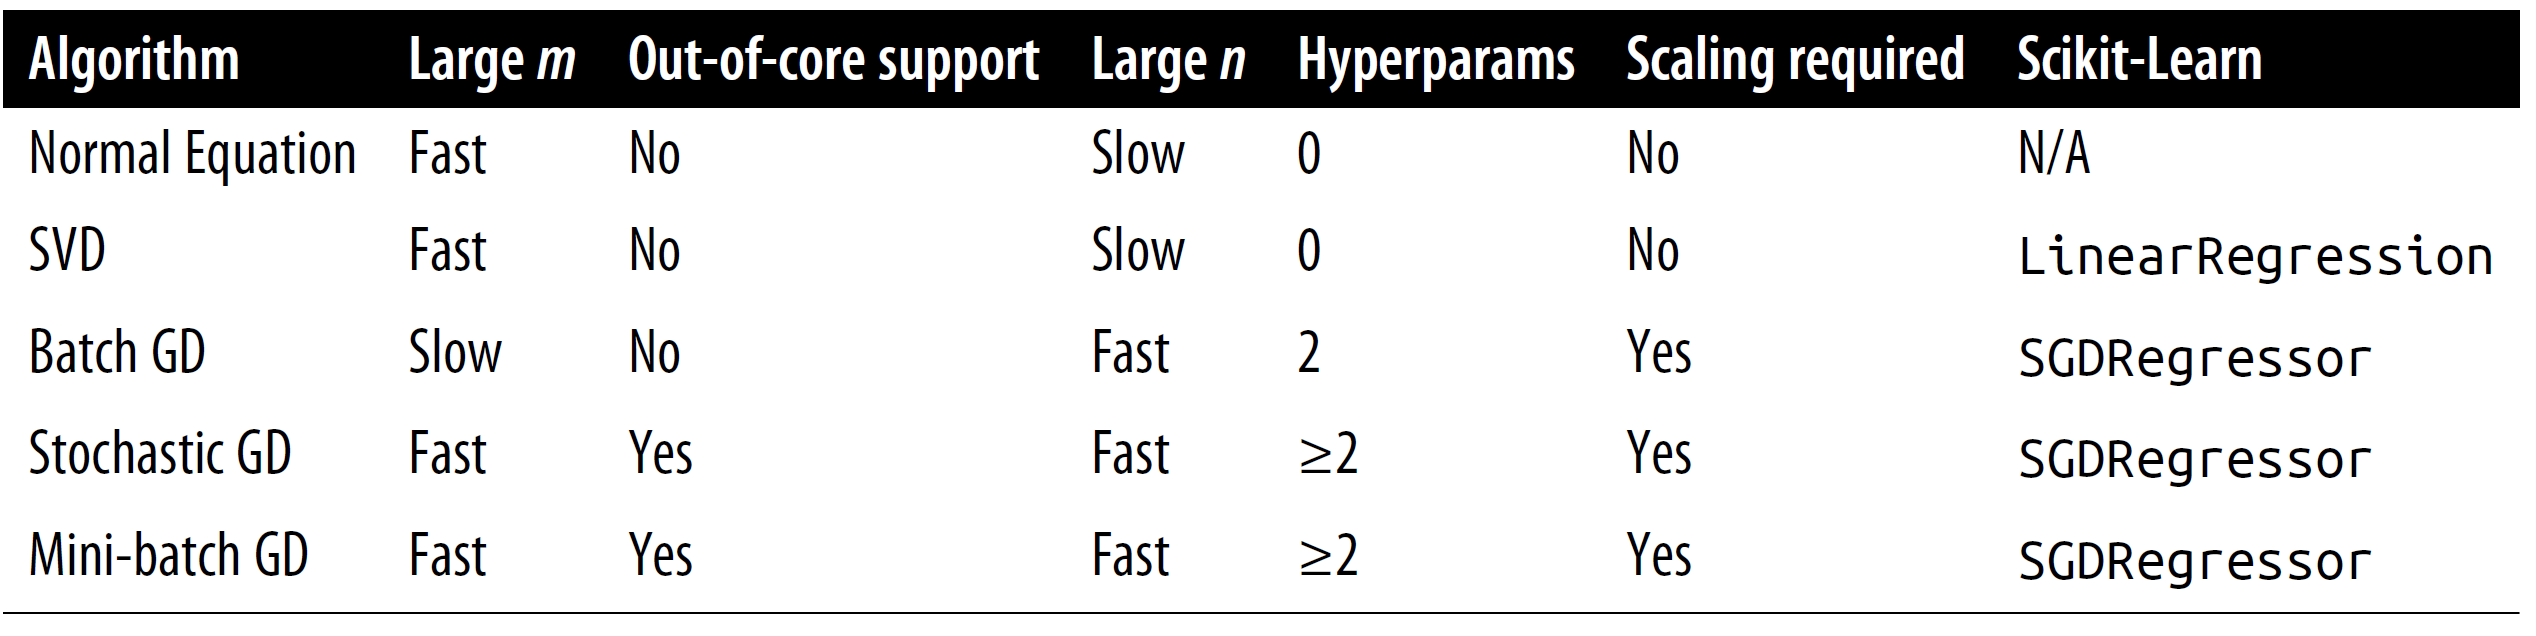

En general estos algoritmos no difieren mucho en cuanto a los resultados y las predicciones en todos los casos son básicamente las mismas.

## Regresión polinomial

Si los datos tienen comportamiento no lineal se puede ajustar un modelo lineal para ajustarse a datos no lineales, simplemente agregando potencias de las covariables como nuevas variables, esto es llamado regresión polinomial.

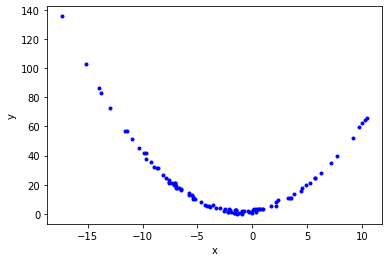

In [15]:
#ejemplo
m = 100 
X = 6*np.random.randn(m,1) - 3
y = 0.5*X**2+X+2+np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
#uso de scikit para ajustar el modelo
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) #degree grado máximo, include_bias incluir columna de unos
X_poly = poly_features.fit_transform(X)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.86806413]), array([[0.99822516, 0.50136405]]))

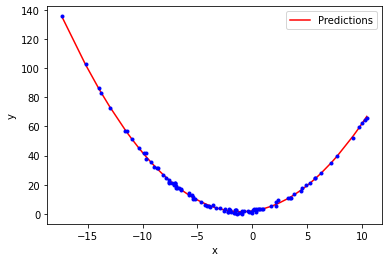

In [18]:
y_pred = lin_reg.predict(X_poly)
plt.plot(X[np.argsort(X.ravel())], y_pred[np.argsort(X.ravel())], "r-")
plt.plot(X,y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Predictions"])
plt.show()

## Curvas de aprendizaje

Con regresión polinomial se ajusta mejor que con regresión simple.

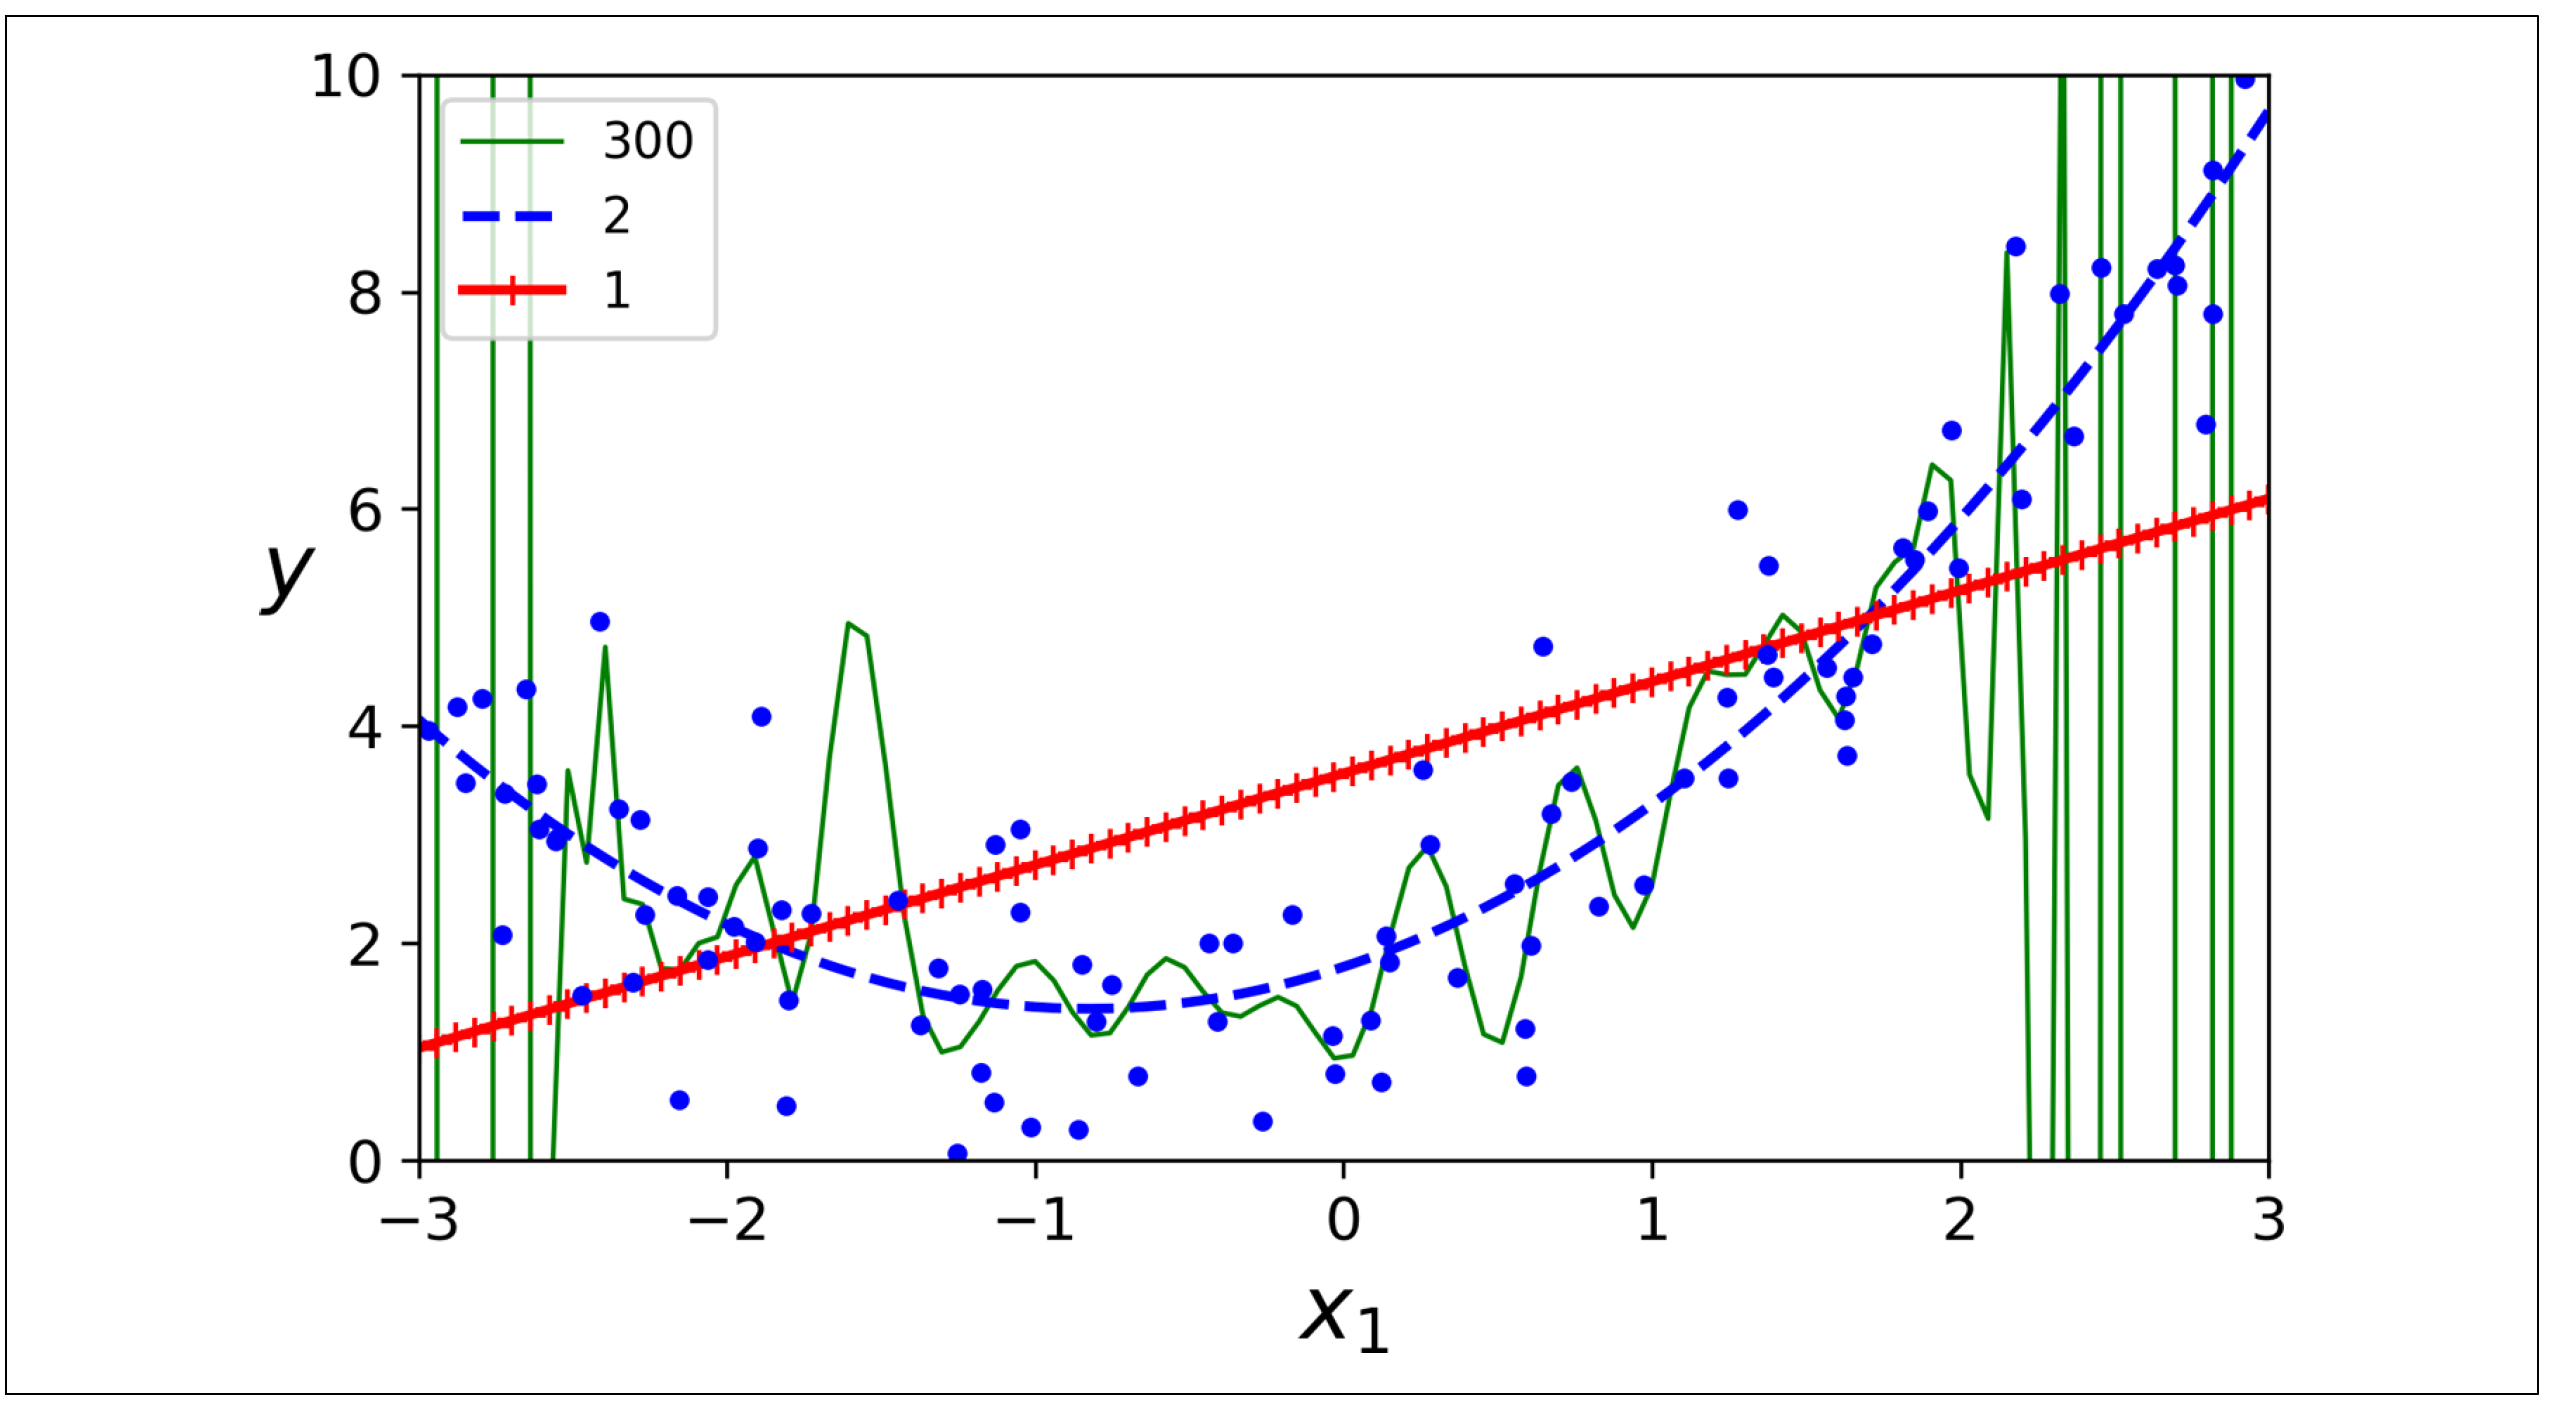

Sin embargo, se tiene problema del overfitting (de hecho también comportamiento errático) para el caso del polinomio de grado 300, para el polinomio cuadrático se tiene un buen ajuste y para la linea recta se tiene underfitting, así que la pregunta que surge es ¿cómo saber si un modelo está haciendo underfitting u overfitting?

Anteriormente, usando cross validation para obtener una estimación del rendimiento de la generalización de un modelo. Si un modelo obtiene un buen resultado en el conjunto de entrenamiento pero no lo hace bien en el conjunto de prueba, existe overfitting y si posee mal rendimiento en ambos existe underfitting.

Otra manera de hacer esto es usar curvas de aprendizaje, las cuales son gráficos del rendimiento del modelo en los conjuntos de entrenamiento y validación como función del tamaño del conjunto de entrenamiento o de la iteración de entrenamiento. Para generar estos gráficos se entrena el el modelo varias veces en conjuntos de prueba de distintos tamaños.

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, axis = False):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mse(y_train_predict, y[:m]))
        val_errors.append(mse(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "validation")
    plt.legend()
    plt.xlabel("Number of instances")
    plt.ylabel("RMSE")
    plt.suptitle("Learning Curves")
    if axis:
        plt.axis([0, 80, 0, 100])
    plt.show()

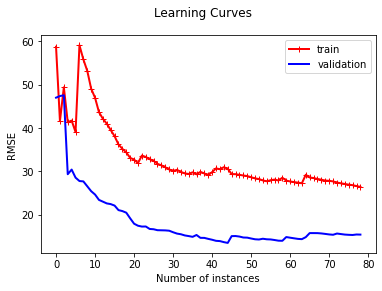

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

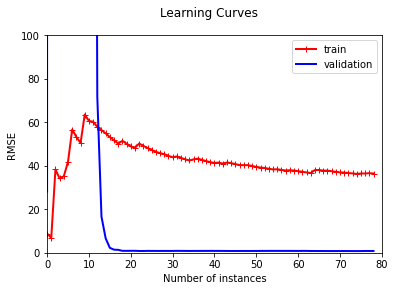

In [21]:
#con un polinomio de grado diez
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y, True)

En el primer caso se puede ver un claro caso de underfitting pues al principio la curva de aprendizaje del modelo arranca abajo pero va creciendo hasta estabilizarse y la curva de validación inicia arriba y luego decrece hasta estabilizarse y ser cercana a la curva de entrenamiento (notar el rmse alto), En el segundo se puede ver realmente una estabilización rápida para el **VERIFICAR Y DISCUTIR**

**Notas**: para mejorar en caso de existir overfitting no sirve añadir más datos, se debe usar un modelo más complejo o usar mejores variables. En el caso del overfitting es alimentarlo con más datos de entrenamiento hasta que el error de validación alcance el de entrenamiento.

**El intercambio sesgo/varianza**

Un resultado teórico importante en estadística es el hecho de que el error de un modelo a la hora de generalizar se puede ezpresar como la suma de los tres errores que se presentan a continuación.

**Sesgo**: esta parte del error en la generalización es debido a supuestos erroneos como por ejemplo que la naturaleza de los datos es lineal cuando no lo es. Un modelo con alto sesgo es más propenso a cometer underfitting.

**Varianza**: esta parte se debe a la sensibilidad del modelo con respecto a los pequeños cambios en los datos de entrenamiento. Un modelo con bastantes grados de libertad es más propenso a tener varianza grande y cometer overfitting.

**Error irreducible**: esta parte se debe al ruido de los mismos datos. La única solución posible a esto es limpiar los datos (arreglar fuentes de datos como reparar sensores rotos, o detectar y remover outliers).

Incrementar la complejidad de un modelo hará que su sesgo disminuya, pero su varianza aumentará. Por esta razón se llama intercambio sesgo/varianza.

## Regresiones regularizadas

La idea es disminuir los grados de libertad del modelo para poder así reducir la posibilidad de que este cometea overfitting. En el caso de la regresión polinomial basta con reducir el grado del polinomio, sin embargo, en el caso de la regresion no polinómica no es tan sencillo pues hay que forzar los pesos (la regresión es una suma ponderada) como se describe a continuación.

**Regresión Ridge**: es una versión regularizada de la regresión lineal no polinómica, se introduce un término de regularización igual a $\alpha \sum_{i = 1}^{n} \theta_{i}^2$ en la función de costo. Lo que hace esto es a no solo ajustarse a los datos sino que también a mantener los pesos lo más pequeños posibles. Cabe resaltar que el término de regularización es añadido a la función de costo durante el entrenamiento, una vez el modelo ha sido entrenado se quiere usar las medidas normales para evaluar el desempeño del modelo.

El parámetro $\alpha$ controla qué tanto se quiere regularizar el modelo. Si el parámetro es cero se tiene la regresión clásica (no lo haga compa) y si el parámetro es muy grande los pesos terminan siendo casi nulos. A continuación se presenta la función de costo para la regresión Ridge $$J\left(\mathbf{\theta}\right) = MSE\left(\mathbf{\theta}\right) + \frac{\alpha}{2} \sum_{i = 1}^{n} \theta_{i}^2$$

Es necesario notar que el termino del intercepto no está regularizado. Si se define $\mathbf{w}$ como el vector de pesos $\left[\theta_1, \cdots, \theta_n\right]$, el término de regularización es $\frac{w^{T}\cdotp w}{2}$ (el numerador es la norma al cuadrado). Para realizar el descenso del gradiente es simplemente añadir $\alpha \mathbf{w}$ al vector gradiente del MSE.

**Nota**: es importante escalar los datos antes de realizar la regresión pues esta es bastante sensible ante la escala de las covariables.

Como en regresión se puede usar una solución exacta o simplemente usar descenso del gradiente y los pros y contras son exactamente los mismos.

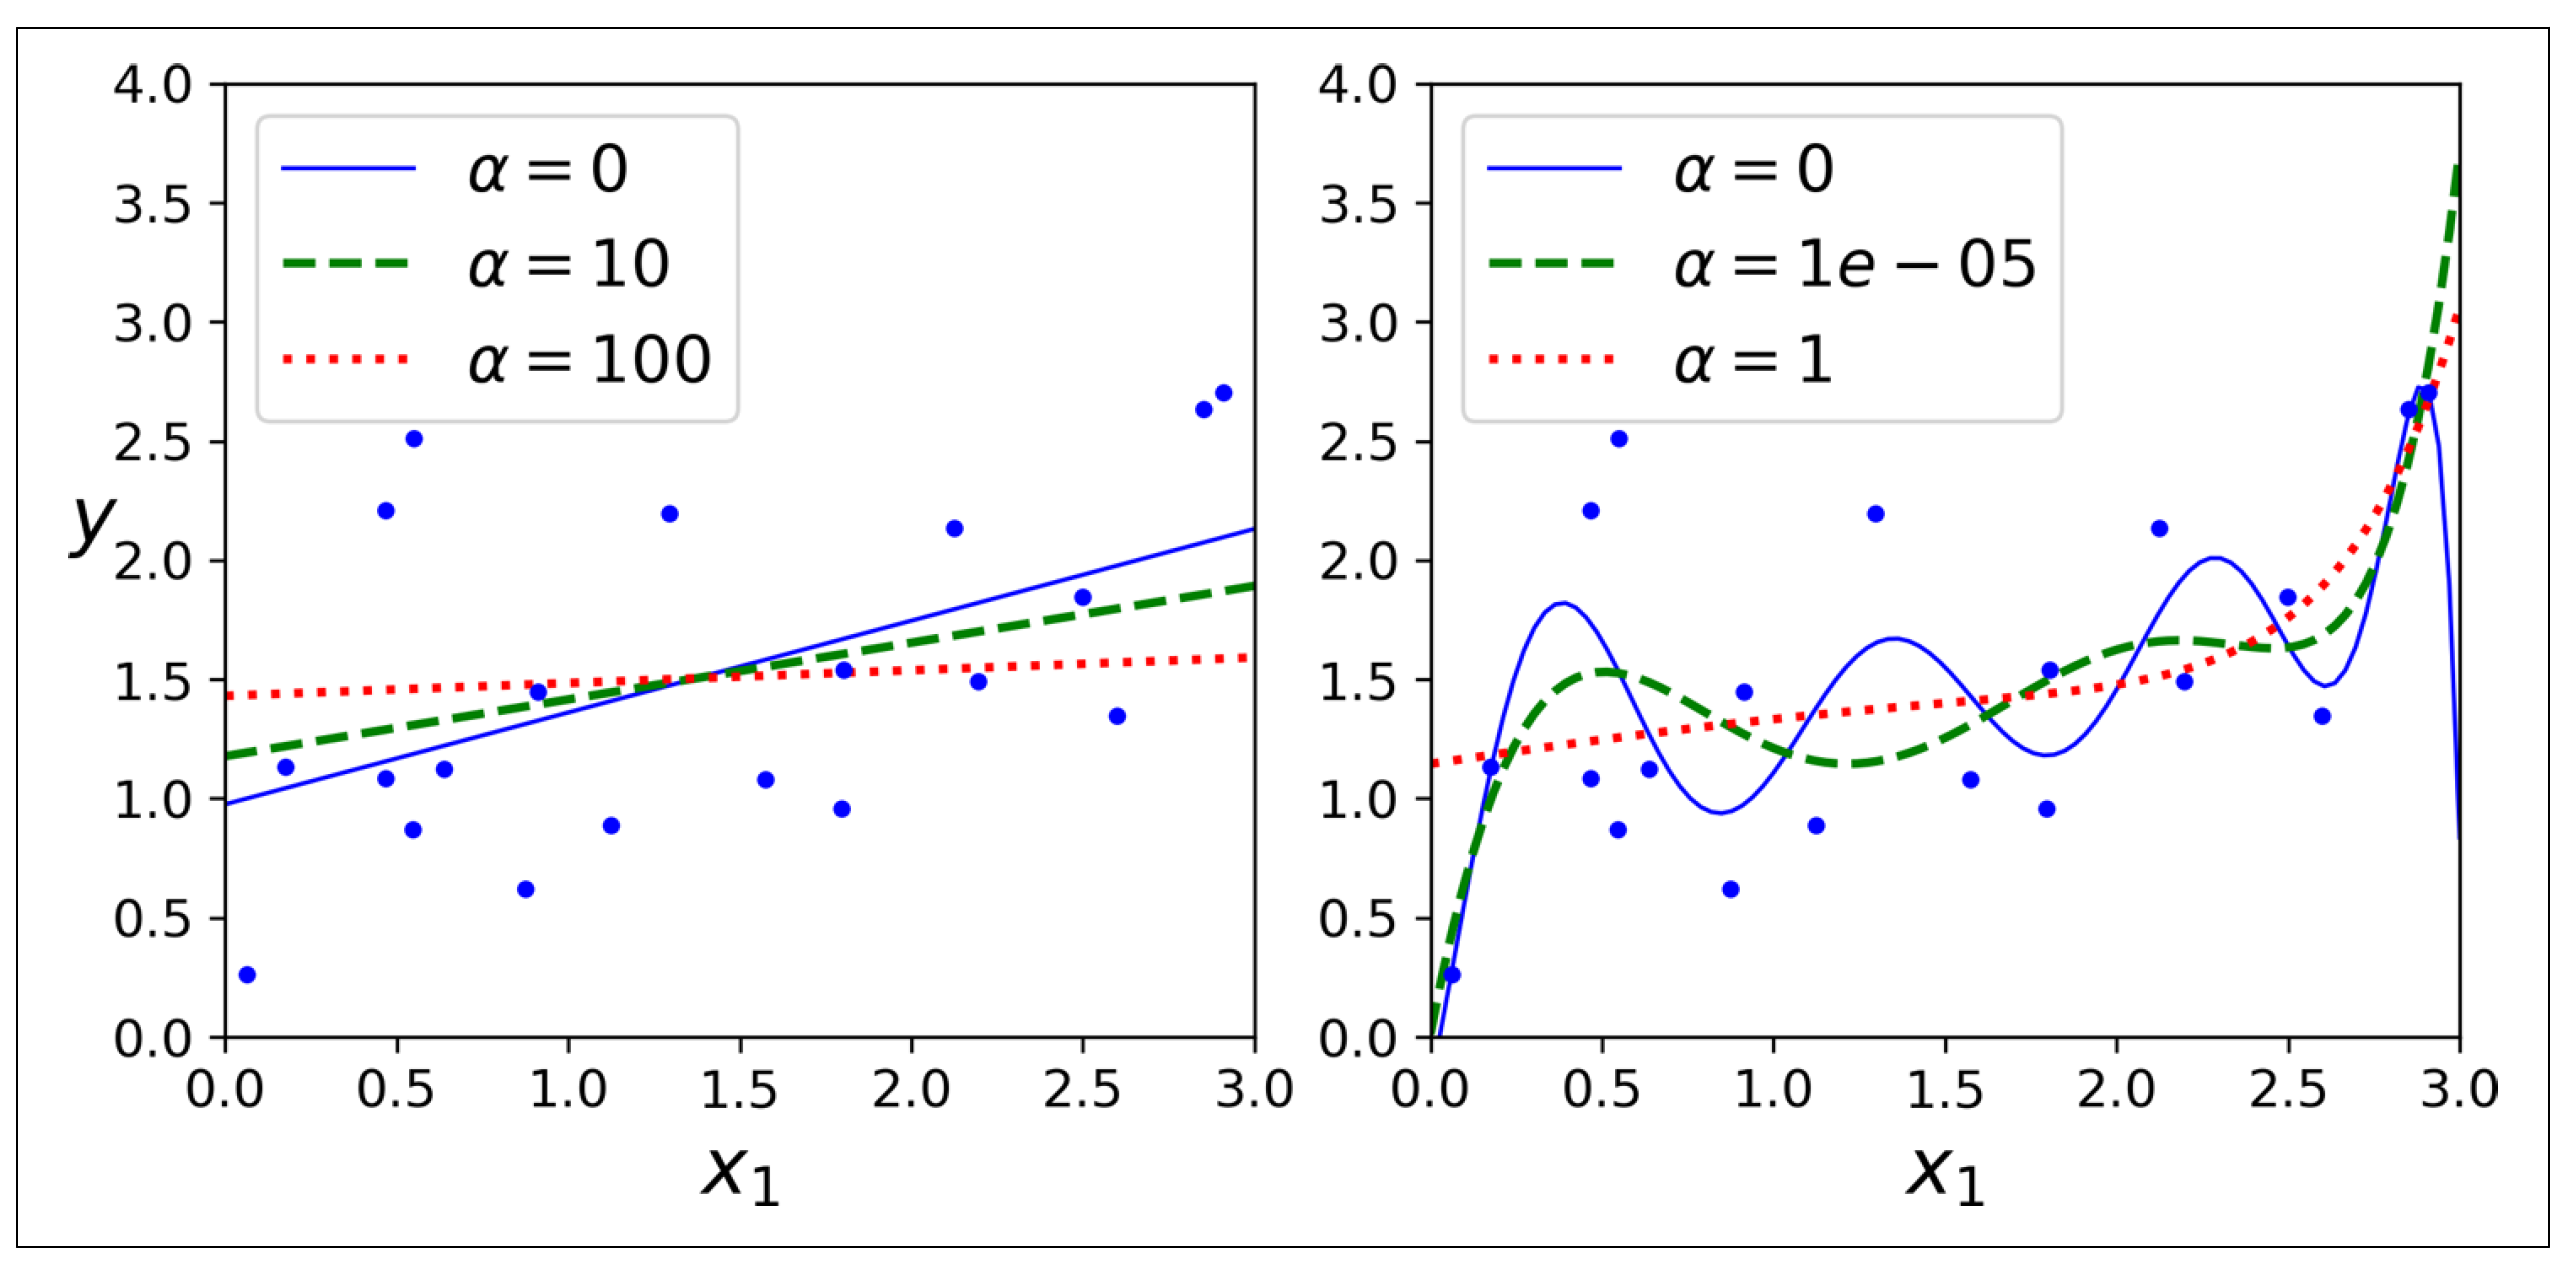

En la izquierda regresión nó polinómica usando regresión ridge, en la derecha se usa un polinomio de grado diez con regresión Ridge.

In [29]:
#implementación usando scikit
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)

print(f"Usando solución exacta con SVD {ridge_reg.predict([[1.5]])}")

#usando descenso del gradiente estocástico
sgd_reg = SGDRegressor(penalty = "l2") #penalty dice que clase de término de regularizacíon usar, en este caso l2 es la norma euclidiana estandar (regresión ridge)
sgd_reg.fit(X,y)

print(f"Usando descenso del gradiente estocástico {sgd_reg.predict(np.array([[1.5]])).ravel()}")

Usando solución exacta con SVD [[14.85598104]]
Usando descenso del gradiente estocástico [14.90700638]


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**Regresión Lasso**: funciona exactamente igual que la regresión ridge pero usa la norma 1 como término de regularización, es decir que la función de costo para la regresión Lasso es $$ J\left(\mathbf{\theta}\right) = MSE\left(\mathbf{\theta}\right) + \alpha \sum_{i = 1}^{n} \left|\theta_{i}\right|$$

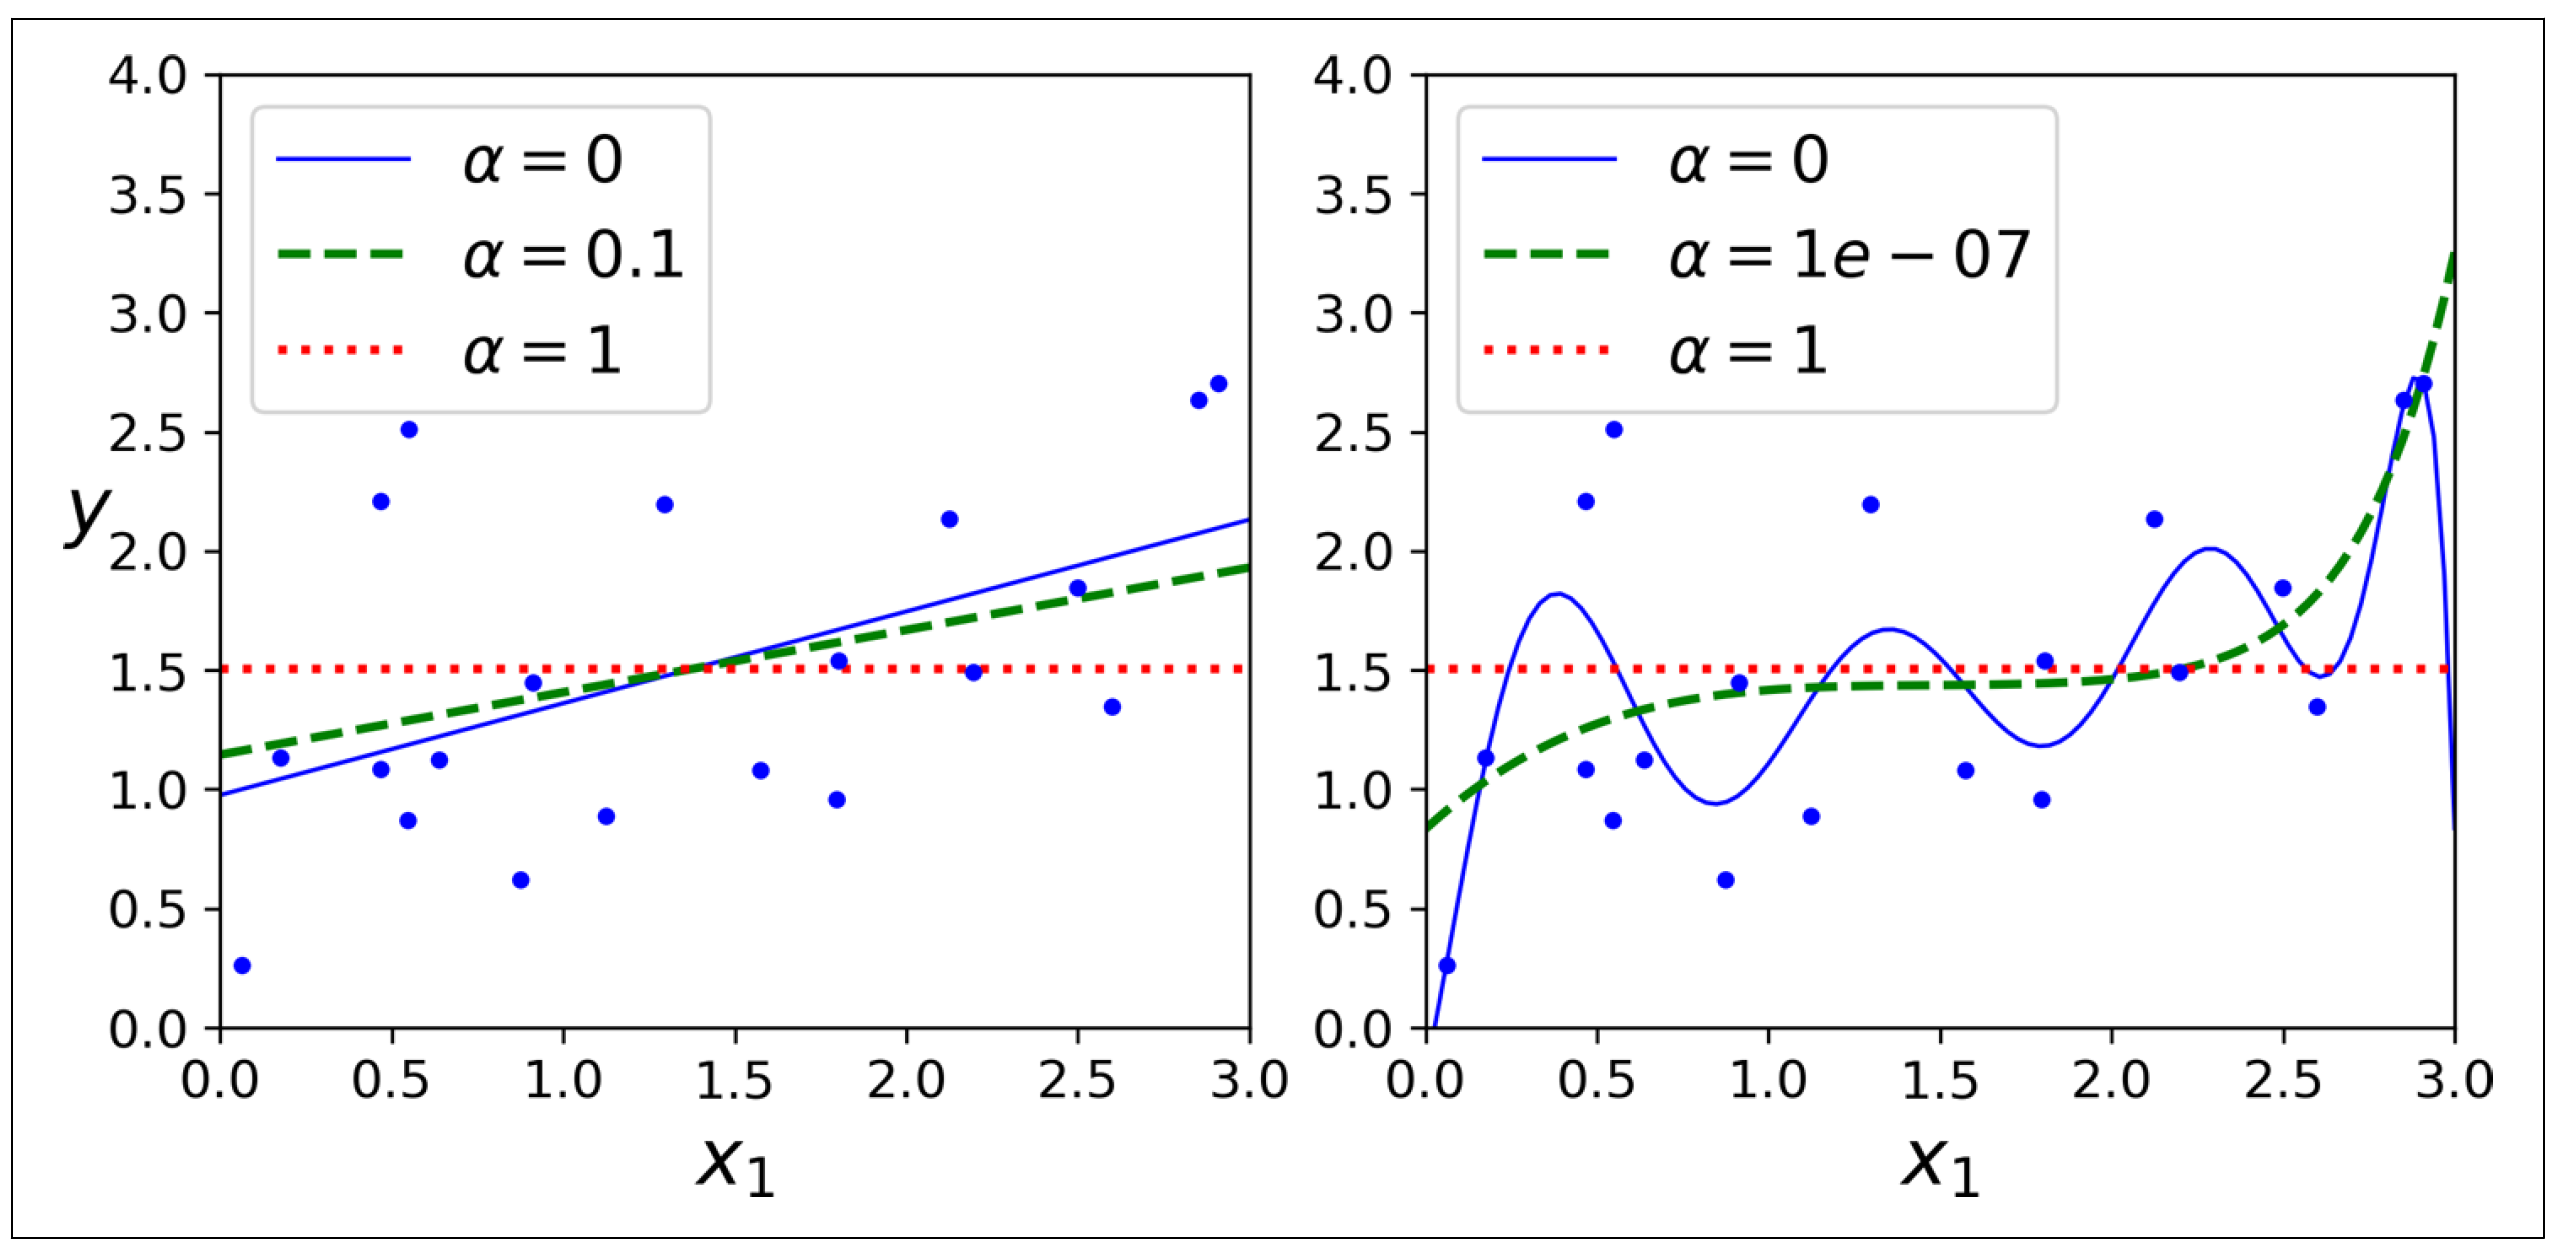

Se puede apreciar la misma clase de modelos empleados en la regresión Ridge pero en este caso usando Regresión Lasso.

Una característica importante de la regresión Lasso es que tiende a eliminar el peso de las variables menos importantes.

**Nota**: la mayor diferencia que presenta la regresión Lasso es que el gradiente se hace más pequeño cuando los parámetros se van acercando al mínimo global lo que naturalmente lo desacelera y ayuda a la convergencia. Para evitar que el descenso del gradiente empiece a rebotar al rededor del mínimo se necesita gradualmente reducir la tasa de aprendizaje.

La función de costo de la regresión Lasso no es diferenciable en $\vec{0}$ pero el vector subgradiente funciona bien como función para aplicar descenso del gradiente, así que la función subgradiente de la regresión Lasso es $$g\left(\mathbf{\theta}\right) = \vec{\nabla} MSE\left(\mathbf{\theta}\right) + \alpha \left[sgn\left(\theta_1\right), \cdots, sgn\left(\theta_1\right)\right]^T$$ 

donde sgn es la función signo.

In [32]:
#usando regresión Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
print(f"Usando regresión Lasso {lasso_reg.predict([[1.5]])}")

#se puede haber usado SGDRegressor con penalty = "l1"

Usando regresión Lasso [14.86602498]


**Red elástica**: es un terreno medio entre Ridge y Lasso, pues su término de regularización es una mezcla entre ambas regresiones mencionadas anteriormente, así la función de costo para la red elástica es $$ J\left(\mathbf{\theta}\right) = MSE\left(\mathbf{\theta}\right) + r\alpha \sum_{i = 1}^{n} \left|\theta_{i}\right| + \frac{1-r}{2}\alpha \sum_{i = 1}^{n} \theta_{i}^2$$

En general es preferible tener un poco de regularización y no usar regresión plana. Ridge es una buena estrategia por default pero si se sospecha que solo hay unas cuantas covariables útiles es mejor usar Lasso o Red elástica pues ellas tienen la tendencia de eliminar las covariables inútiles a cero. En general Red elástica es preferida sobre Lasso porque Lasso podría comportarse de manera errática cuando el número de covariables es mayor que el de observaciones o cuando varias covariables están fuertemente correlacionadas.

In [33]:
#usando red elastica
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) #l1 ratio es r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

print(f"Usando Red elástica {elastic_net.predict([[1.5]])}")

Usando Red elástica [14.86813122]


**Parada temprana**: una manera de parar algoritmos iterativos como lo es el descenso del gradiente es parar el entrenamiento tan pronto como el error de validación alcance un mínimo

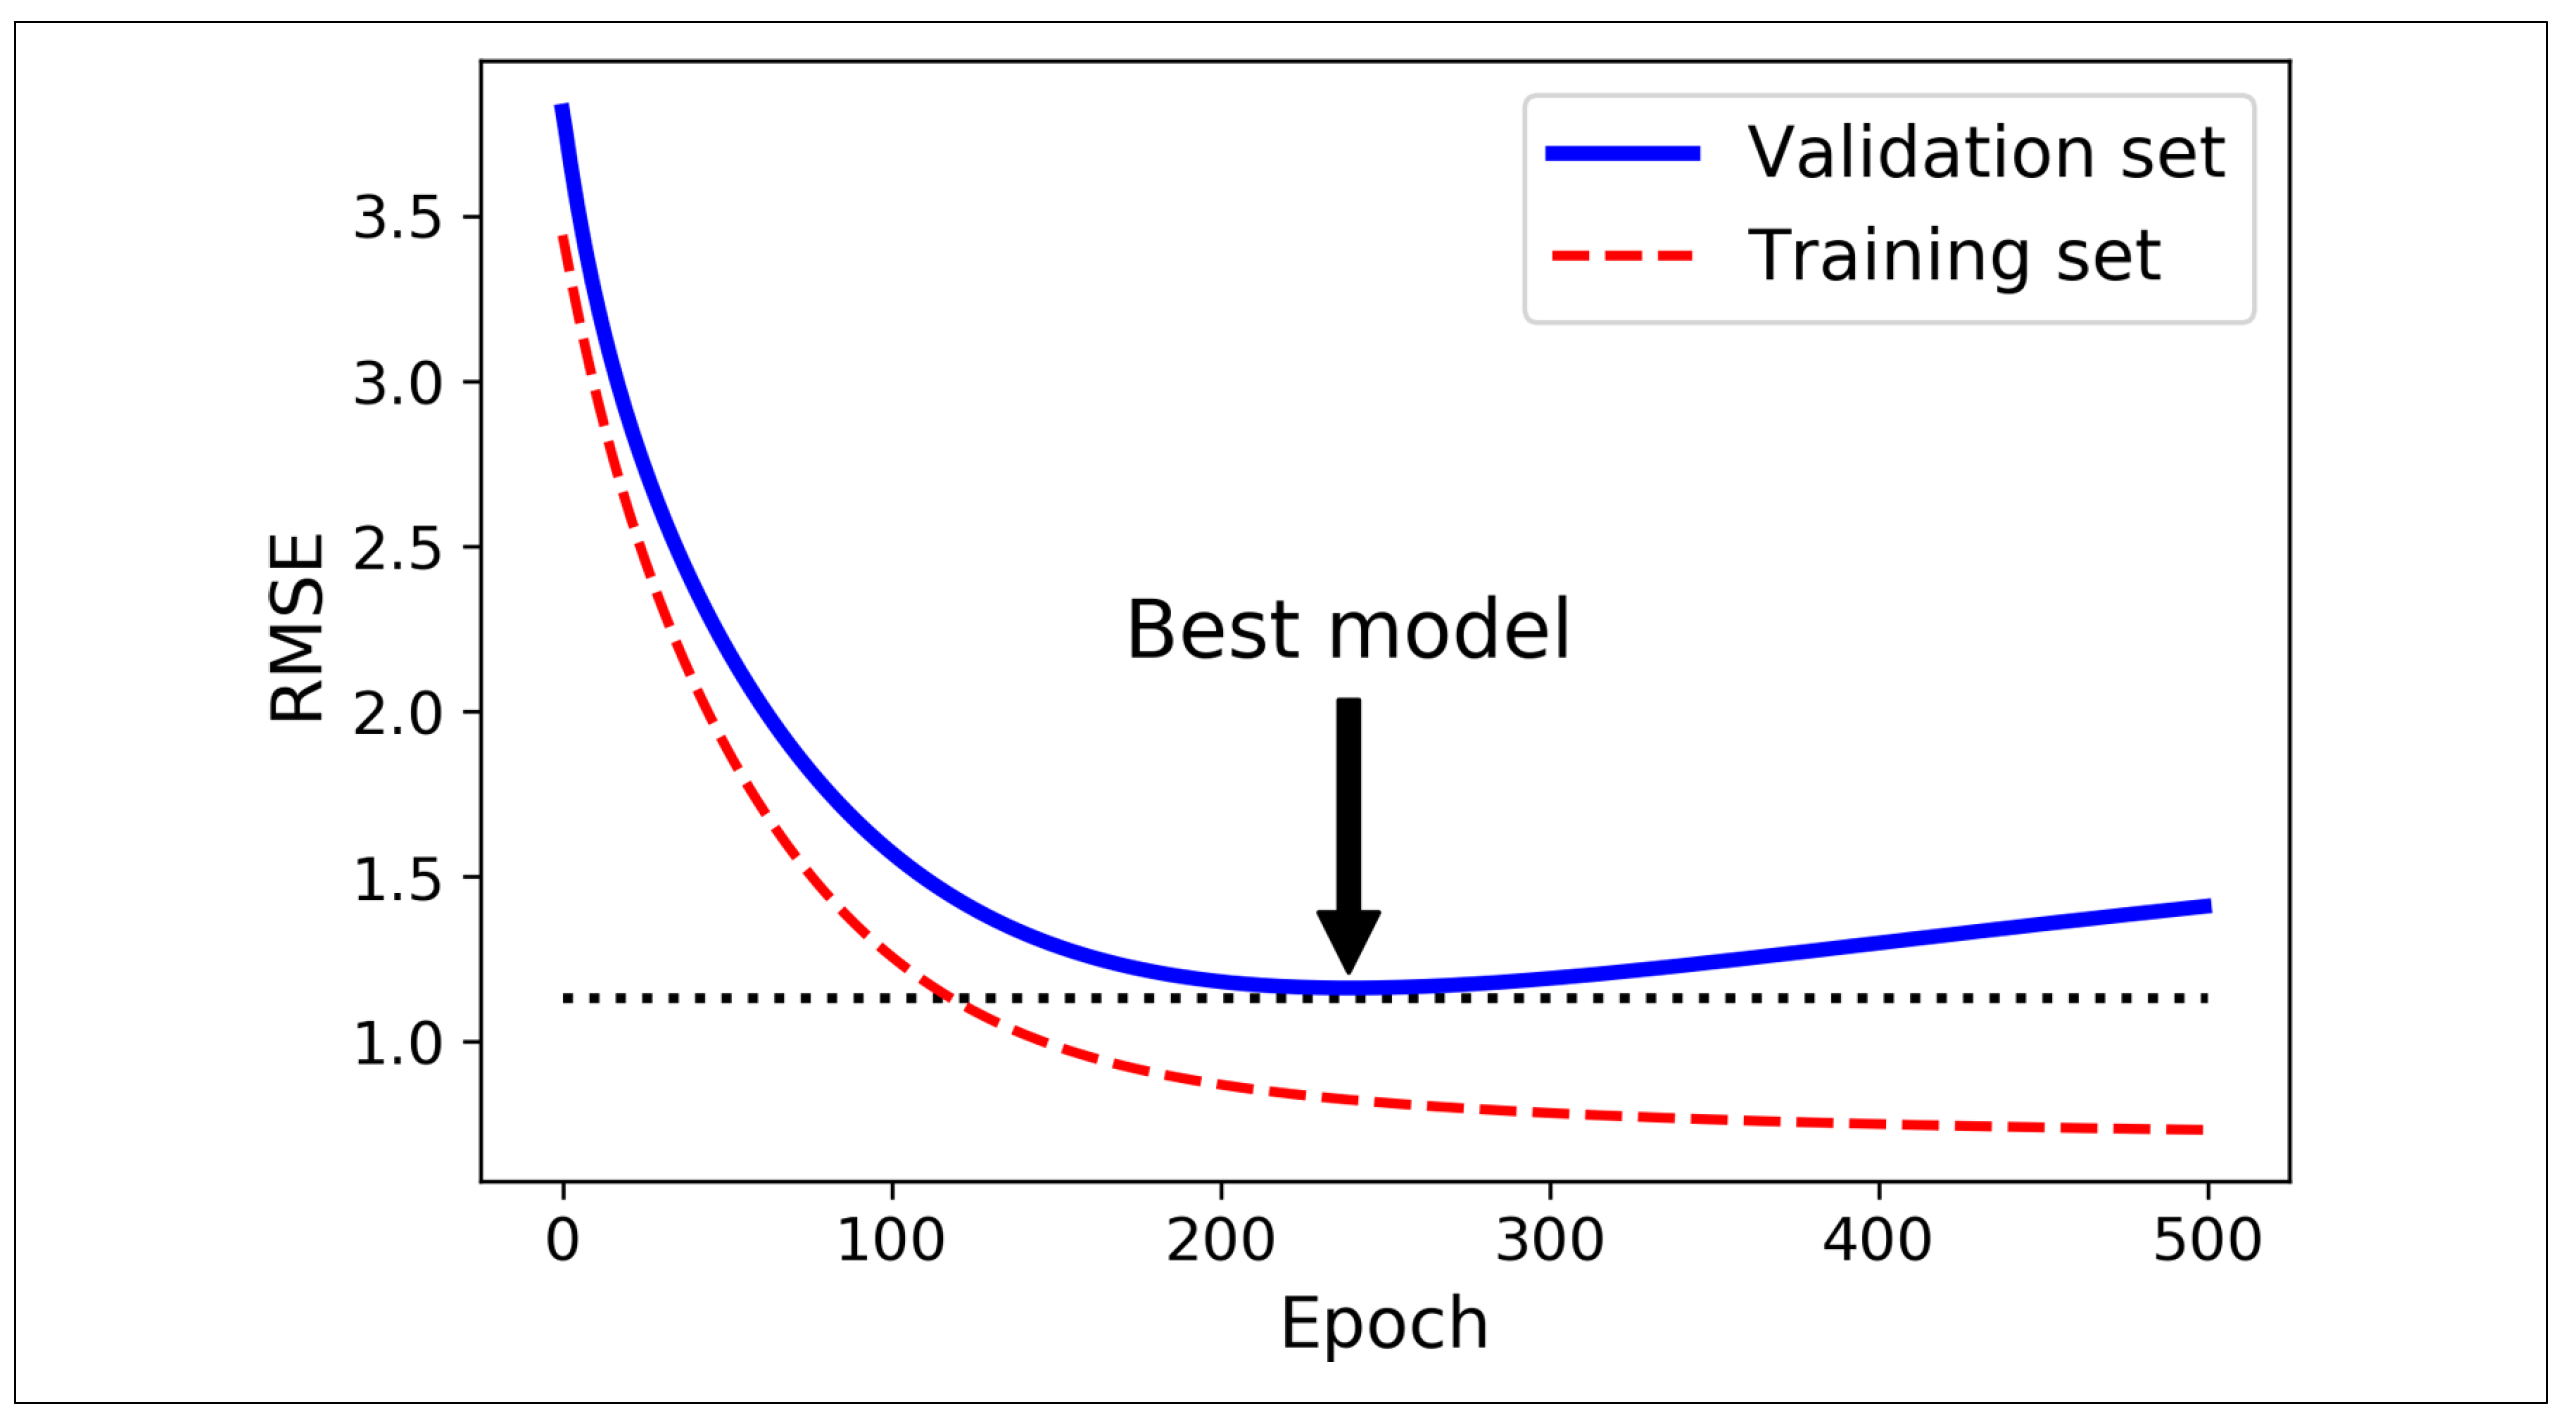

Como se puede observar, el punto señalado es la parada pues representa un mínimo, ya que luego de esto el RMSE para el set de validación comienza a aumentar y esto es sinónimo de overfitting en este caso pues se tiene que el RMSE del set de entrenamiento es muy bajo.

**Nota**: con descenso del gradiente estocástico y por mini lotes se tienen curvas que no son muy suaves, por esto puede ser bastante complejo saber si se alcanzó un mínimo o no. Una solución para esto es dejarlo correr bastante durante un tiempo luego de alcanzar un mínimo y verificar que permanece por encima de ese mínimo por un buen rato, luego de verificar esto se procede a escoger el mínimo.

In [42]:
#implementación
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

#preparando los datos
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1):
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mse(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

**Nota**: usando el warm_start lo que se hace es inicializar la búsqueda de parámetros con los encontrados en la iteración n, para la iteración n+1.